# Mount Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Import Suporting Pythol Libraries bold text

In [2]:
!pip install sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import sklearn
import csv
import numpy as np
import datetime as dt
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns',100)
import missingno as msno
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.metrics import classification_report
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

#Reading Data/ Exploratory Data Analysis (EDA)

#Accidents

In [3]:
accidents=pd.read_csv('gdrive/MyDrive/UoH/Trimester2/Big Data and Data Mining (771762_A21_T2)/UK ROAD ACCIDENT ASSIGNMENT /Road_Safety_Data_Accidents_2019.csv', dtype={'Accident_Index':str}) # Reading in accident data from google drive

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
accidents.head(2)# displays the first 2 rows of the dataset

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,1,E09000033,3,4202,1,30,1,2,3,4202,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,9,E09000022,3,23,2,30,0,-1,-1,0,-1,-1,4,1,1,0,0,1,3,E01003117


In [5]:
accidents.info()#display the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [6]:
accidents.isna().sum()# to see the number of null values contained in the dataset

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

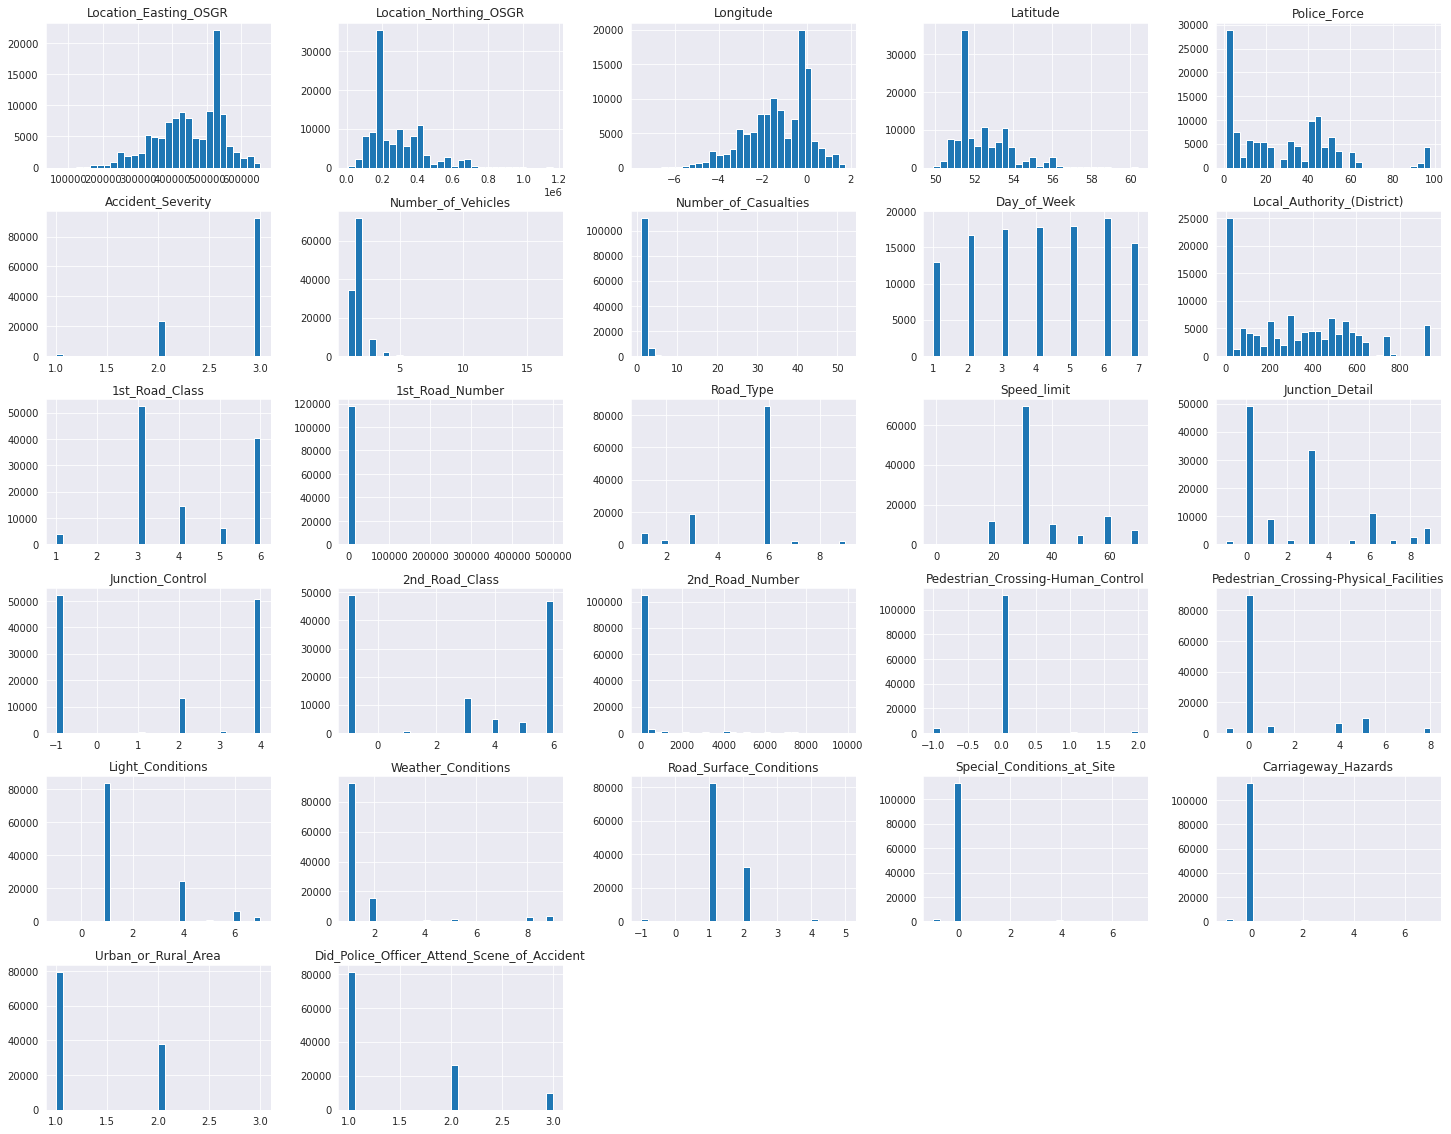

In [7]:
accidents.hist(bins=30, figsize=(25,20))#visualization of the distribution of the various columns contained in the dataset
plt.show()

#Vehicles

In [8]:
vehicles = pd.read_csv('/content/gdrive/MyDrive/UoH/Trimester2/Big Data and Data Mining (771762_A21_T2)/UK ROAD ACCIDENT ASSIGNMENT /Road_Safety_Data_Vehicles_2019.csv', dtype={'Accident_Index':str})# Reading in vehicle data from google drive
vehicles.head(2)# displays the first 2 rows of the dataset

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2


In [9]:
vehicles.info()#display the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

In [10]:
vehicles.isna().sum()# to see the number of null values contained in the dataset

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

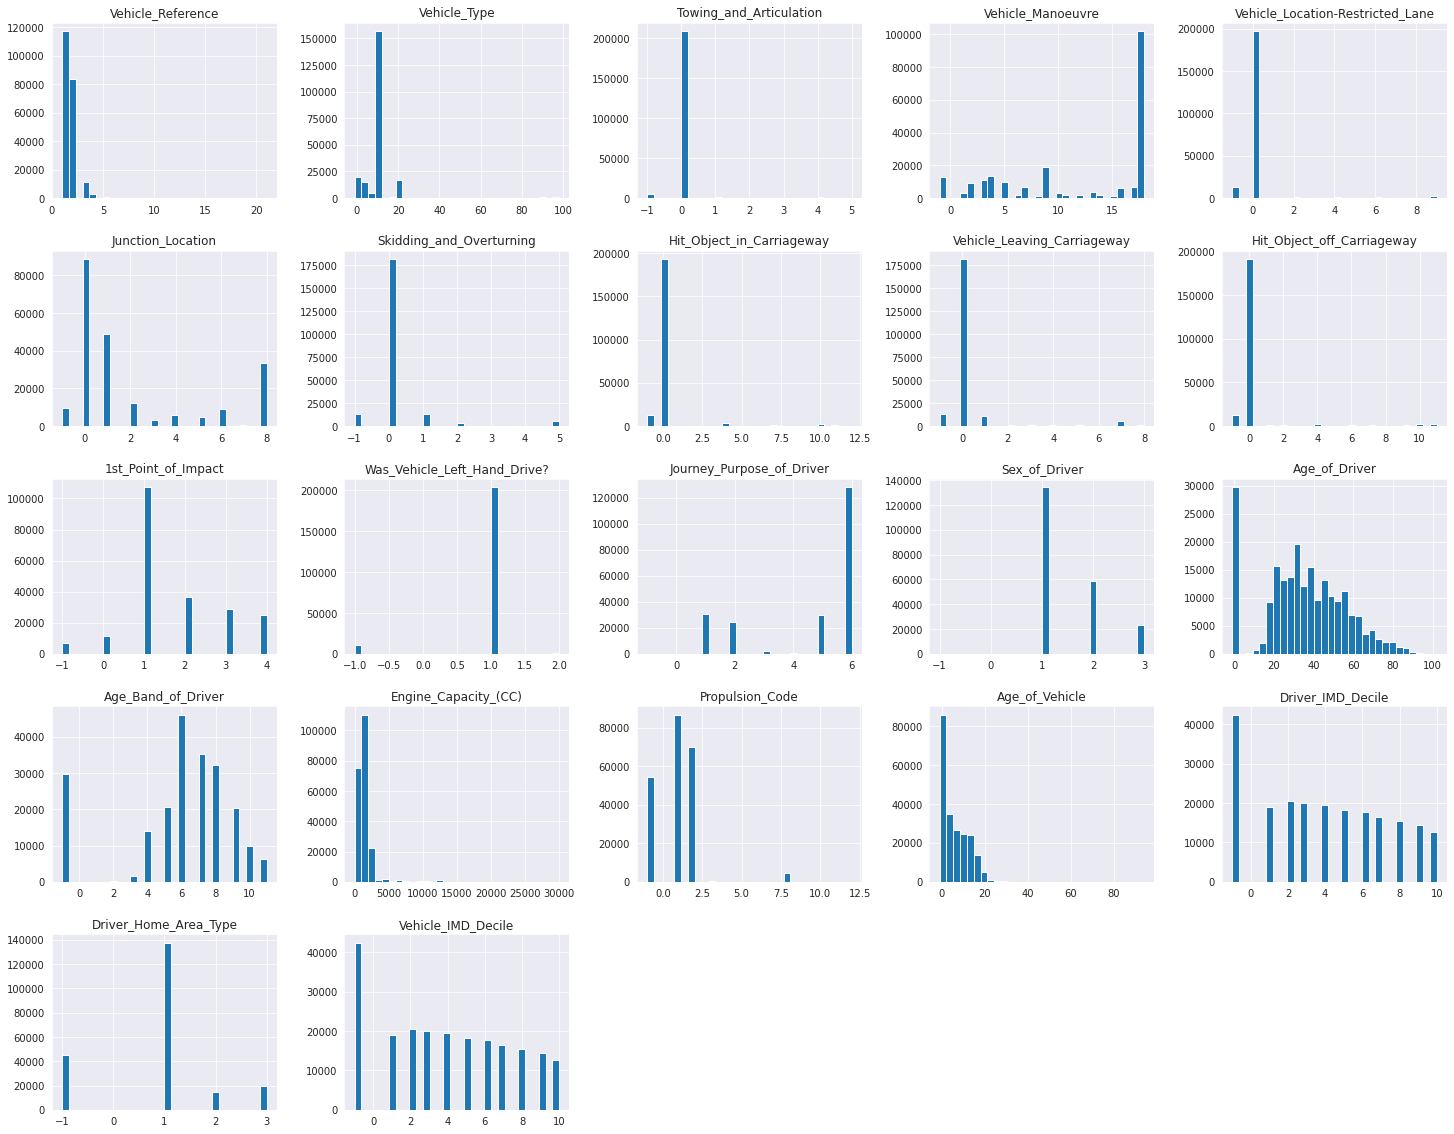

In [11]:
vehicles.hist(bins=30, figsize=(25,20))#visualization of the distribution of the various columns contained in the dataset
plt.show()

#Casualties

In [12]:
casualties = pd.read_csv('gdrive/MyDrive/UoH/Trimester2/Big Data and Data Mining (771762_A21_T2)/UK ROAD ACCIDENT ASSIGNMENT /Road_Safety_Data_Casualties_2019.csv', dtype={'Accident_Index':str})# Reading in accident data from google drive
casualties.head(2) # displays the first 2 rows of the dataset

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5


In [13]:
casualties.info() #display the information about the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [14]:
casualties.isna().sum()# to see the number of null values contained in the dataset

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

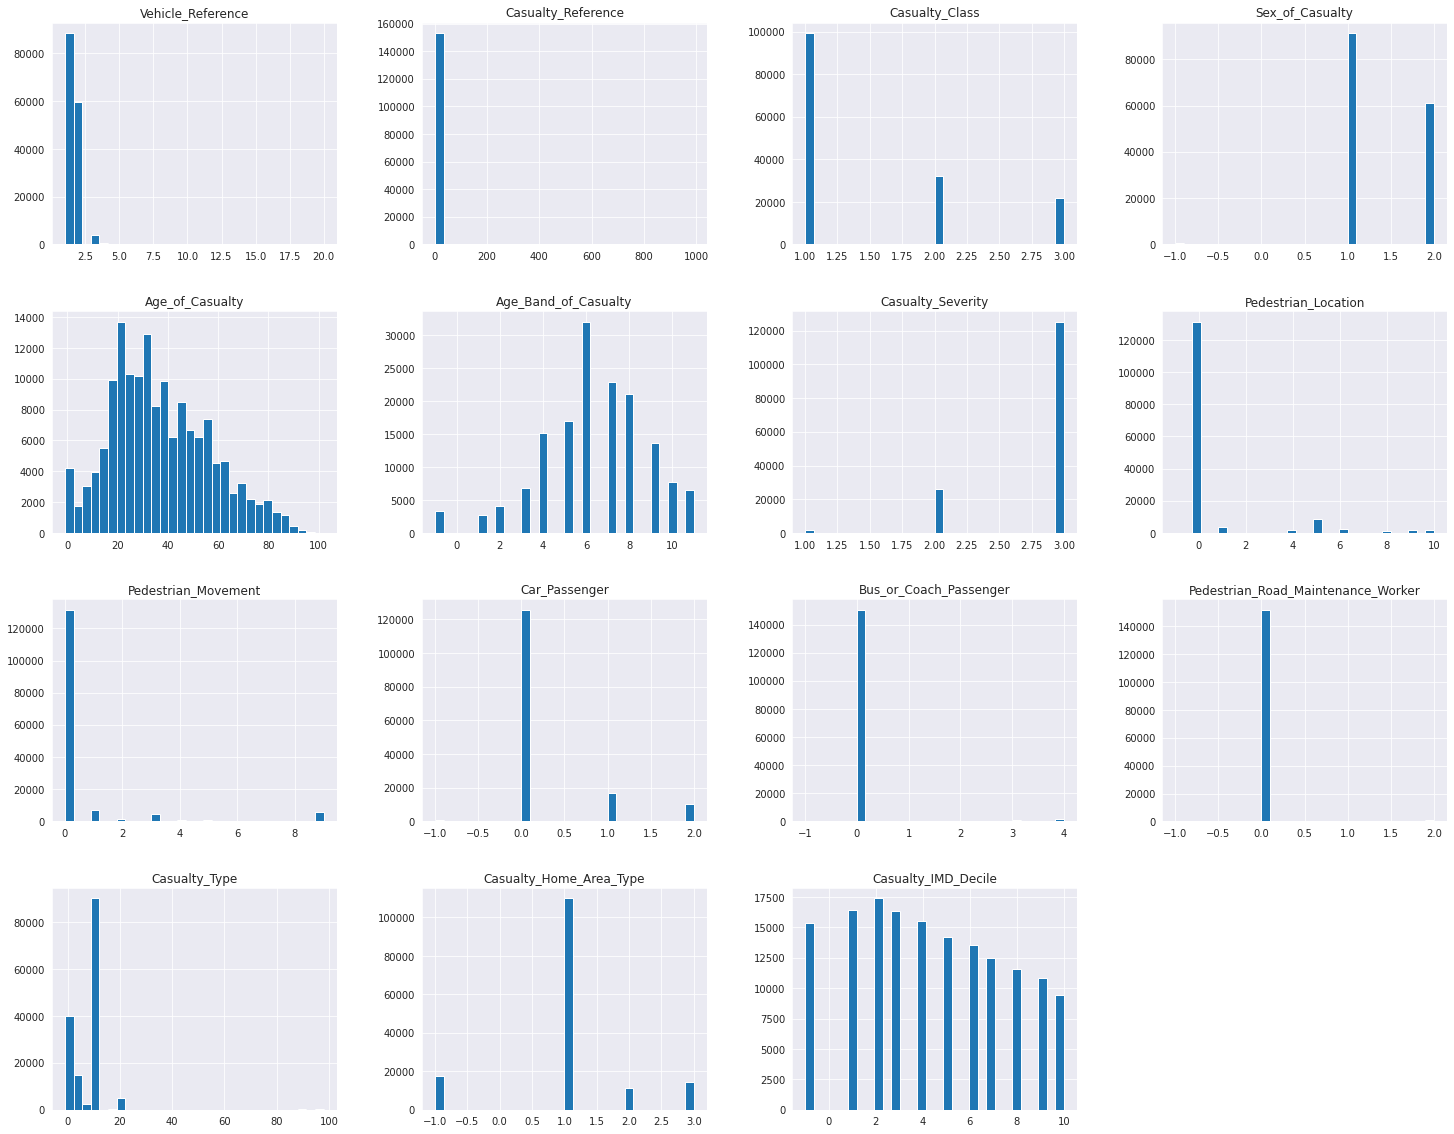

In [15]:
casualties.hist(bins=30, figsize=(25,20)) #visualization of the distribution of the various columns contained in the dataset
plt.show()

# Accident Data Correlation Heat Map

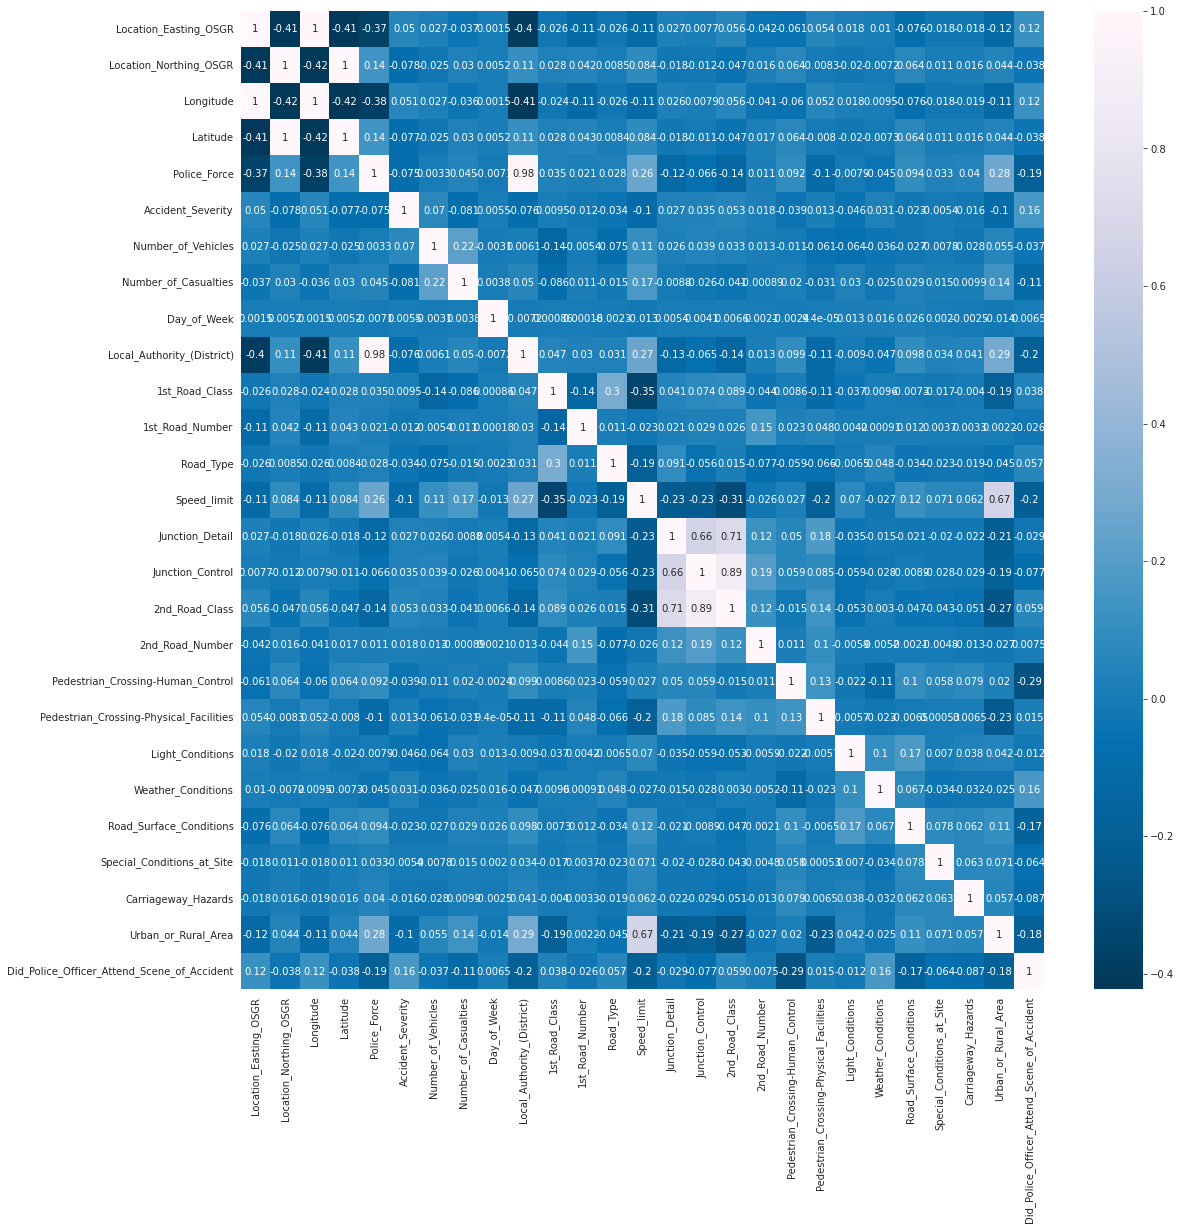

In [16]:
correlation = accidents.corr()#name a variable to lookup the correlation between the various columns
plt.figure(figsize=(18,18))
sns.heatmap(correlation, cmap='PuBu_r', annot=True)
plt.show()

# Geographic Accident Severity Exploration 

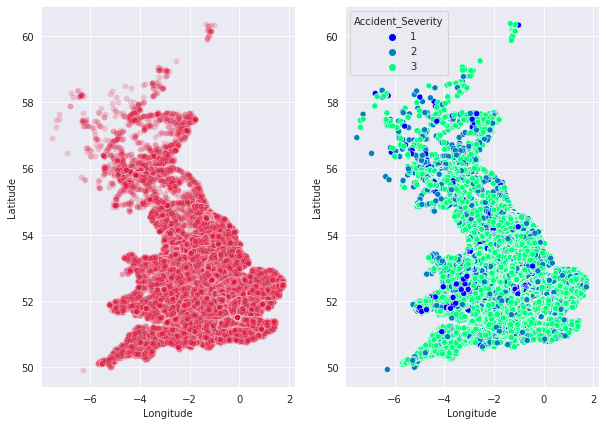

In [17]:
plt.figure(figsize = (10,7))# a plot of the accident severity accordint to the location in the United Kingdom using the longitude and lattitude
plt.subplot(1,2,1)# defines the plot size
sns.scatterplot(data=accidents, x = "Longitude", y = "Latitude", color = "crimson", alpha = 0.2)
plt.subplot(1,2,2)
sns.scatterplot(data=accidents, x = "Longitude", y = "Latitude", hue = "Accident_Severity", palette = "winter")
plt.show()

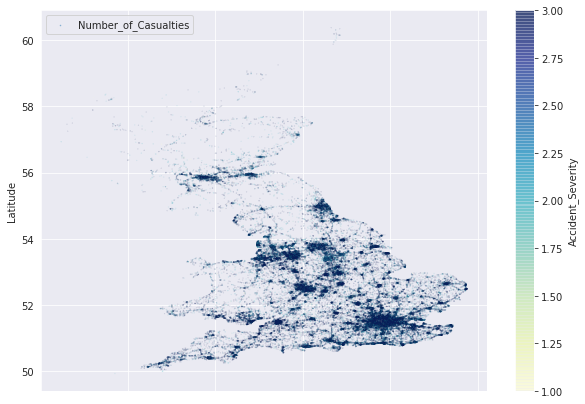

In [18]:
accidents.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = 0.5, 
             s = accidents["Number_of_Casualties"]/100, label = "Number_of_Casualties", figsize=(10,7),
             c = "Accident_Severity", cmap = plt.get_cmap("YlGnBu"), colorbar= True
             )# Accident severity plot accorning to number of casualties 
plt.legend()

#2. Data Cleaning 



In [19]:
# Creating a copy of each of the dataset to preserve the original file 
accidents_copy = accidents.copy()
vehicles_copy = vehicles.copy()
casualties_copy = casualties.copy()


In [20]:
#dropping the colums which are highly correlated 
for col in accidents_copy.columns:
  if 'Location_Northing_OSGR' in col:
    del accidents_copy[col]
  elif 'Location_Easting_OSGR' in col:
    del accidents_copy[col]


In [21]:
accidents_copy.dropna(inplace=True)
accidents_copy.isna().sum()

Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-

In [22]:
accidents_copy['Hour'] = accidents_copy['Time'].str[0:2] # slicing the first and second string from time column
accidents_copy['Hour'] = pd.to_numeric(accidents_copy['Hour']) # converting the new column to a numeric datetype
accidents_copy['Hour'] = accidents_copy['Hour'].fillna('00') # fill NaN values in the new Hour column
accidents_copy['Hour'] = accidents_copy['Hour'].astype('int') # cast values to integer type

## **3. Preprocessing the Data**










## 3.1. Handling Date and Time

In [23]:
# Changing days of the week to their actual names (Sunday to Saturday)
replacement_days_of_the_week = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}
accidents_copy['Day_of_Week'] = accidents_copy['Day_of_Week'].map(replacement_days_of_the_week)#applying the function effect to the Day of the week column

In [24]:
accidents_copy['Day']=pd.DatetimeIndex(accidents_copy['Date']).day #extract Date from datetime pandas
accidents_copy['Month'] = pd.DatetimeIndex(accidents_copy['Date']).month#extract Month from datetime pandas
accidents_copy['Year'] = pd.DatetimeIndex(accidents_copy['Date']).year #extract Year from datetime pandas

In [25]:
# Changing Months of the year to their actual names (January to December)
replacement_months_of_the_year = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
accidents_copy['Month'] = accidents_copy['Month'].map(replacement_months_of_the_year) #applying the function effect to the month column

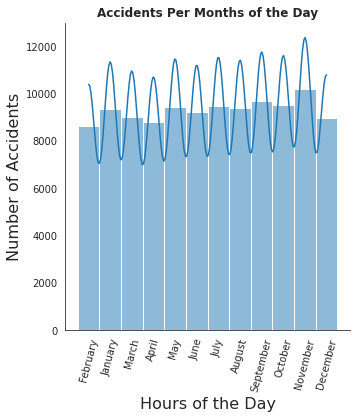

In [26]:
 # a plot of the accident number according to months of the year
%matplotlib inline 
sns.set_style('white')
sns.displot(data=accidents_copy,x=accidents_copy["Month"],kde=True)
plt.xticks(rotation= 75)
plt.title("Accidents Per Months of the Day",fontsize=12,fontweight="bold")
plt.xlabel("Hours of the Day", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.show()

#**Question A1**
What are our expectations? Should there be particular hours of the day that feature more accidents?

#Answer
From the graph, accidents ocure mostly in the evenings from 17:00, this is evidently because of after work stress of driving home in a hurry to rest

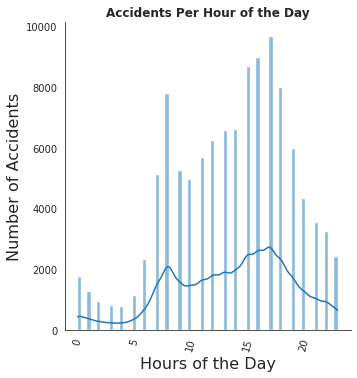

In [27]:
 # a plot of the accident number according to hours of the day
%matplotlib inline
sns.set_style('white')
sns.displot(data=accidents_copy,x=accidents_copy["Hour"],kde=True)
plt.xticks(rotation= 75)
plt.title("Accidents Per Hour of the Day",fontsize=12,fontweight="bold")
plt.xlabel("Hours of the Day", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.show()

In [28]:
accidents_copy_vehicles_copy = pd.concat([accidents_copy, vehicles_copy], axis=1) #merging accident and vehicle dataset
accidents_copy_casualties_copy = pd.concat([accidents_copy, casualties_copy], axis=1) #merging accident and casualty dataset

# Question A2
In regards to days of the week, are there going to be particular days with higher rates of accidents? Justify your answer.

#Answer
Accidents occur mostly on fridays, this is probably because people are tired from the work week, while there are more cars on the road from those going for parties and weekend getaways 

In [29]:
accidents_copy['Day_of_Week'].mode()

0    Friday
dtype: object

In [30]:
accidents_copy['Day_of_Week'].value_counts()

Friday       18109
Thursday     17070
Wednesday    16925
Tuesday      16745
Monday       15820
Saturday     14800
Sunday       12291
Name: Day_of_Week, dtype: int64

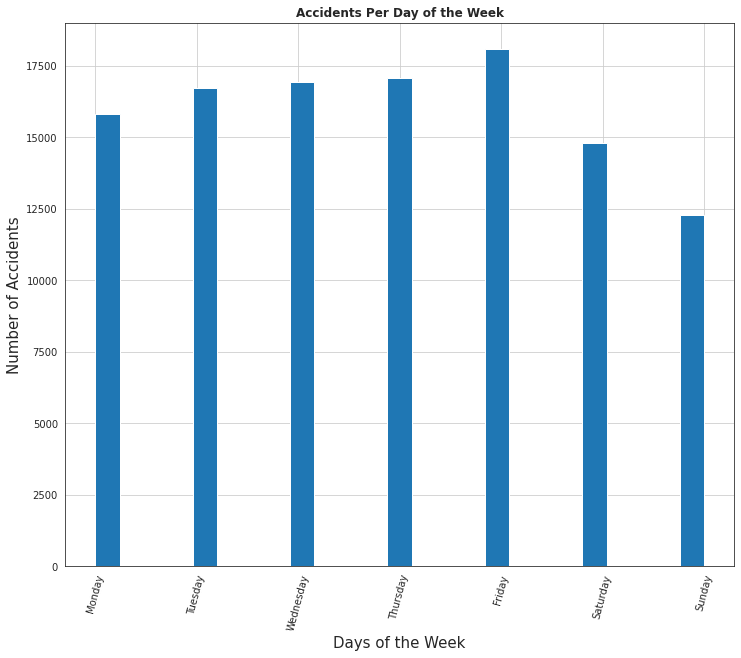

In [31]:
 # a plot of the accident number according to days of the week
accidents_copy['Day_of_Week'].hist(bins=25, figsize=(12,10))
plt.xticks(rotation= 75)
plt.title("Accidents Per Day of the Week",fontsize=12,fontweight="bold")
plt.xlabel("Days of the Week", fontsize=15)
plt.ylabel("Number of Accidents", fontsize=15)
plt.show()

#**Question B1**
For motorbikes, are there significant hours of the day, on which accidents occur?

#Answer
From the graph, Motorbike accidents ocure mostly in the evenings from 17:00, this is evidently because of after work stress of riding home in a hurry to rest

In [32]:
# define a function to fetch details of motor vehicle types in the vehicle dataset and returning vales for non motorbike as Nil
def motor_vehicles(Vehicle_Type):
    if Vehicle_Type == 2:
        return "MBike <= 50cc"
    elif Vehicle_Type == 3:
        return "MBike <= 125cc"
    elif Vehicle_Type == 4:
        return "MBike >125cc-500cc"
    elif Vehicle_Type == 5:
        return "MBike >500cc"
    elif Vehicle_Type == 4:
        return "MBike unknown"
    else:
        return 'Nil'

In [33]:
# apply our function to the temporary accident and vehicle merged data
accidents_copy_vehicles_copy['Vehicle_match'] = accidents_copy_vehicles_copy['Vehicle_Type'].apply(motor_vehicles)
Motorbike_accident_hour = accidents_copy_vehicles_copy[['Vehicle_Type', 'Hour', 'Vehicle_match']] # selecting the target columns
Motorbike_accident_hour.head(2)

,Vehicle_Type,Hour,Vehicle_match
0,9,17.0,Nil
1,9,21.0,Nil


In [34]:
Motorbike_accident_hour = Motorbike_accident_hour[Motorbike_accident_hour.Vehicle_match != 'Nil'] #dropping the rows with Nil value which are non motorbike
Motorbike_accident_hour.head(2)

,Vehicle_Type,Hour,Vehicle_match
30,4,12.0,MBike >125cc-500cc
39,3,18.0,MBike <= 125cc


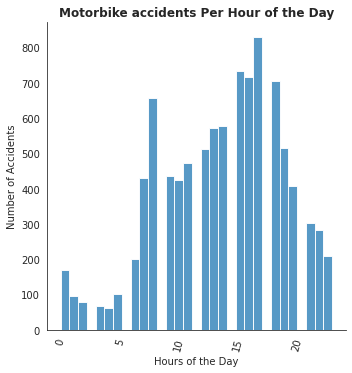

In [35]:
 # a plot of the motobike accident number according to hours of the day
%matplotlib inline
sns.set_style('white')
sns.displot(data=Motorbike_accident_hour,x=Motorbike_accident_hour["Hour"])
plt.xticks(rotation= 75)
plt.title("Motorbike accidents Per Hour of the Day",fontsize=12,fontweight="bold")
plt.xlabel("Hours of the Day", fontsize=10)
plt.ylabel("Number of Accidents", fontsize=10)
plt.show()

#**Question B2**
Are there significant days of the week, on which Motorbike accidents occur?

# Answer
Motorbike accidents occur mostly on Fridays 

In [36]:
Motorbike_accident_Day = accidents_copy_vehicles_copy[['Vehicle_Type', 'Day_of_Week', 'Vehicle_match']] #selecting the target features for comparison
Motorbike_accident_Day.head(2)

,Vehicle_Type,Day_of_Week,Vehicle_match
0,9,Monday,Nil
1,9,Tuesday,Nil


In [37]:
Motorbike_accident_Day = Motorbike_accident_Day[Motorbike_accident_Day.Vehicle_match != 'Nil']#dropping the rows with Nil value which are non motornike
Motorbike_accident_Day.head(2)

,Vehicle_Type,Day_of_Week,Vehicle_match
30,4,Tuesday,MBike >125cc-500cc
39,3,Tuesday,MBike <= 125cc


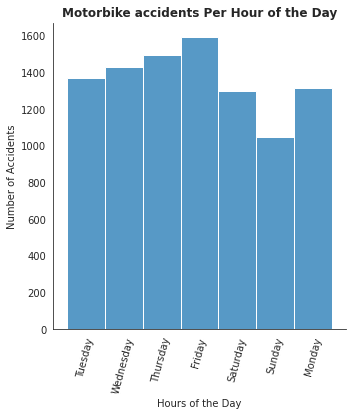

In [38]:
%matplotlib inline
sns.set_style('white')
sns.displot(data=Motorbike_accident_Day,x=Motorbike_accident_Day["Day_of_Week"])
plt.xticks(rotation= 75)
plt.title("Motorbike accidents Per Hour of the Day",fontsize=12,fontweight="bold")
plt.xlabel("Hours of the Day", fontsize=10)
plt.ylabel("Number of Accidents", fontsize=10)
plt.show()

#**Question C1**
For pedestrians involved in accidents, are there significant hours of the day on which they are more likely to be involved?

#Answer 

From the graph, pedestrians accidents ocure mostly in the evenings from 17:00, this is evidently because of after work stress of riding home in a hurry to rest

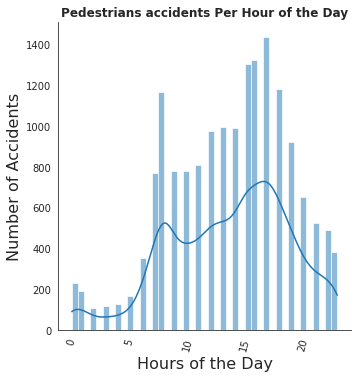

In [39]:
#plotting line graph of pedestrian accident occuring within each hour
accidents_copy_casualties_copy=accidents_copy_casualties_copy[(accidents_copy_casualties_copy['Casualty_Type']==0)]
%matplotlib inline
sns.set_style('white')
sns.displot(data=accidents_copy_casualties_copy,x=accidents_copy_casualties_copy["Hour"],kde=True)
plt.xticks(rotation= 75)
plt.title("Pedestrians accidents Per Hour of the Day",fontsize=12,fontweight="bold")
plt.xlabel("Hours of the Day", fontsize=16)
plt.ylabel("Number of Accidents", fontsize=16)
plt.show()


#**Question C2**
For Pedestrains, are there significant days of the week, on which they are more likely to be involved?

# Answer
Pedestrains accidents occur mostly on Fridays

<Figure size 864x720 with 0 Axes>

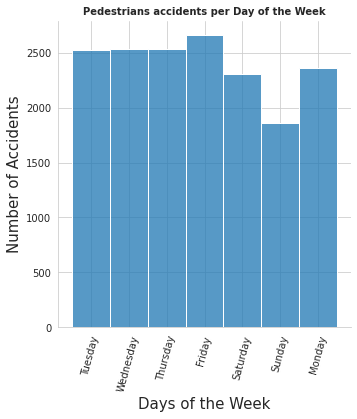

In [40]:
#plotting line graph of pedestrian accident occuring within the days of the week
%matplotlib inline 
sns.set_style('whitegrid')
plt.figure(figsize=(12,10))
sns.displot(data=accidents_copy_casualties_copy,x=accidents_copy_casualties_copy["Day_of_Week"])
plt.xticks(rotation= 75)
plt.title("Pedestrians accidents per Day of the Week",fontsize=10,fontweight="bold")
plt.xlabel("Days of the Week", fontsize=15)
plt.ylabel("Number of Accidents", fontsize=15)
plt.show()

#Question D1. 
What impact, if any, does daylight savings have on road traffic accidents in the week after it starts

In [41]:
accidents_copy['Date'] = pd.to_datetime(accidents_copy['Date'])
accidents_copy['Day_Number'] = accidents_copy['Date'].dt.dayofyear # creating column day number from date column

In [42]:
daylight_list = [] # list to accomodate the day number for which daylight starts and ends
daylight_month_start = 3
daylight_day_start = 90
daylight_month_end = 10
daylight_day_end = 300

for Day_number in accidents_copy['Day_Number']: # funtion returns 0 or 1 for daylight number  
  if (Day_number >= daylight_day_start) and (Day_number <= daylight_day_end):
    daylight_list.append(1)
  else:
    daylight_list.append(0)

In [43]:
col_add = pd.Series(daylight_list, name = 'apply_ind')
accidents_copy = pd.concat([accidents_copy, col_add], axis =1) #merge the datafram with newly created daylist column
accidents_copy.head(2)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Day,Month,Year,Day_Number,apply_ind
0,2019010128300,-0.153842,51.508057,1.0,3.0,2.0,3.0,2019-02-18,Monday,17:50,1.0,E09000033,3.0,4202.0,1.0,30.0,1.0,2.0,3.0,4202.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,E01004762,17.0,18.0,February,2019.0,49.0,0.0
1,2019010152270,-0.127949,51.436208,1.0,3.0,2.0,1.0,2019-01-15,Tuesday,21:45,9.0,E09000022,3.0,23.0,2.0,30.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,1.0,1.0,0.0,0.0,1.0,3.0,E01003117,21.0,15.0,January,2019.0,15.0,0.0


In [44]:
apply = accidents_copy[(accidents_copy['apply_ind'] == 1)]
not_apply = accidents_copy[(accidents_copy['apply_ind'] == 0)]

In [45]:
week1 = accidents_copy.loc[accidents_copy['Day_Number'].between(90, 96)]
week1_count = week1['Hour'].value_counts().sort_index()
week1_count.sum()

1997

In [46]:
init_week = accidents_copy.loc[accidents_copy['Day_Number'].between(83, 89)]
init_week_count = init_week['Hour'].value_counts().sort_index()
init_week_count.sum()

2242

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

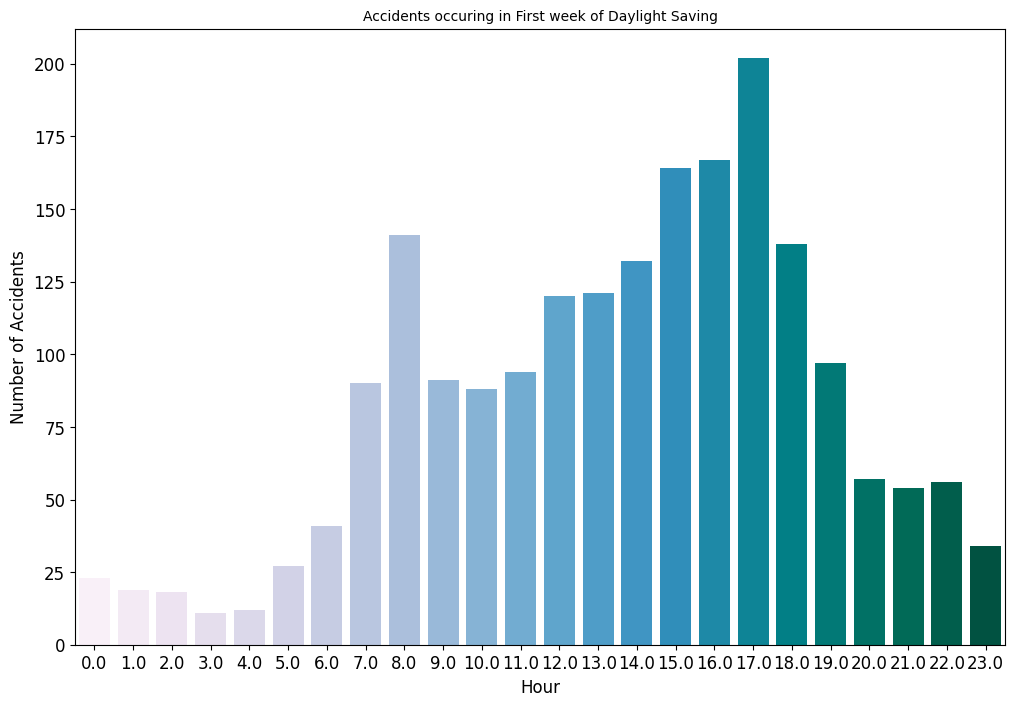

In [47]:
plt.style.use('default')
plt.figure(figsize=(12,8))

sns.barplot(week1_count.index,week1_count, 
            saturation=1, palette='PuBuGn')
plt.title("Accidents occuring in First week of Daylight Saving", fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

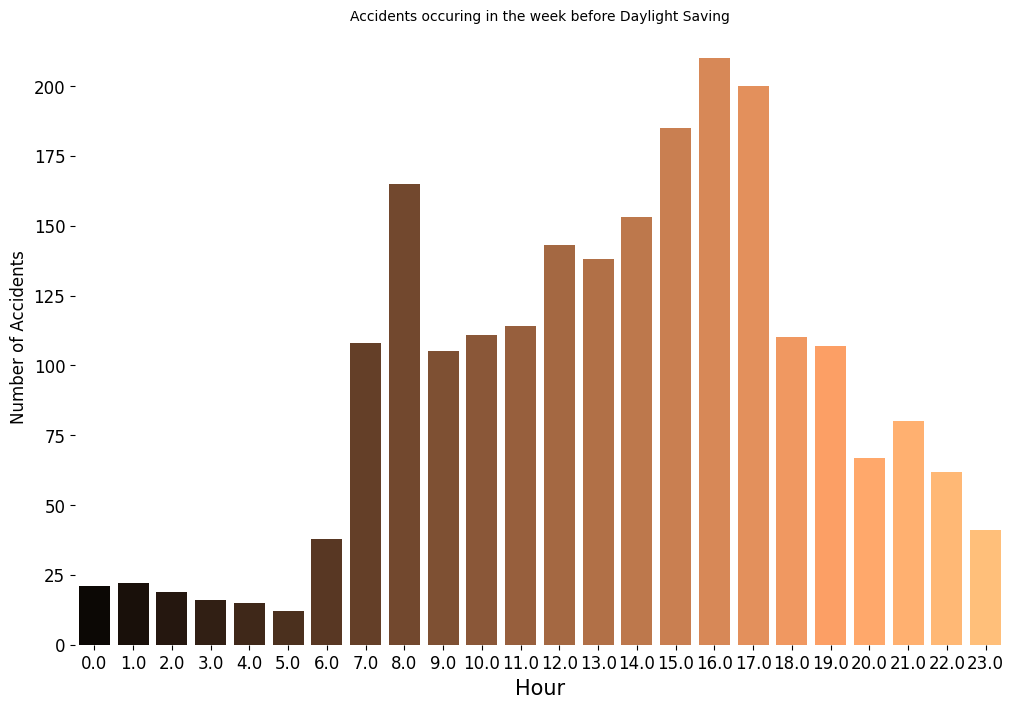

In [48]:
plt.style.use('default')
plt.figure(figsize=(12,8))

sns.barplot(init_week_count.index,init_week_count, 
            saturation=1, palette='copper')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents occuring in the week before Daylight Saving",fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=15)
plt.ylabel("Number of Accidents", fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

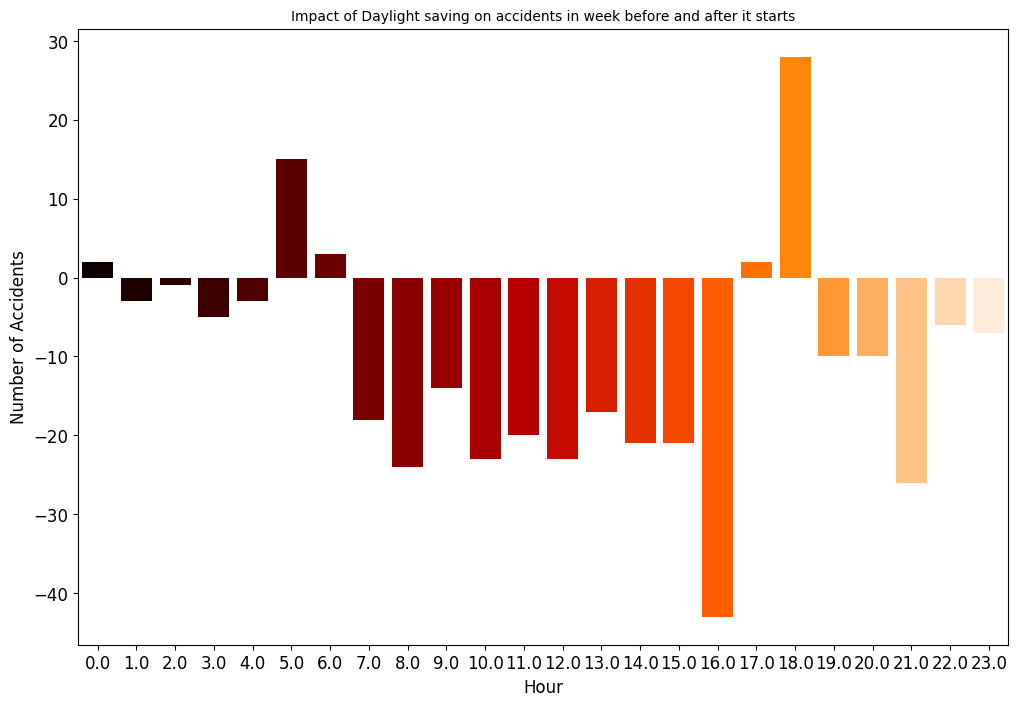

In [49]:
impact_calc = week1_count - init_week_count

plt.style.use('default')
plt.figure(figsize=(12,8))
sns.barplot(impact_calc.index,impact_calc, 
            saturation=1, palette='gist_heat')
plt.title("Impact of Daylight saving on accidents in week before and after it starts",fontsize=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

#Question D2 
What impact, if any, does daylight savings have on road traffic accidents in the week after it stops?

In [50]:
end_week = accidents_copy.loc[accidents_copy['Day_Number'].between(294, 300)]
end_week_count = end_week['Hour'].value_counts().sort_index()
end_week_count.sum()

2093

In [51]:
new_week = accidents_copy.loc[accidents_copy['Day_Number'].between(301, 307)]
new_week_count = new_week['Hour'].value_counts().sort_index()
new_week_count.sum()

2147

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

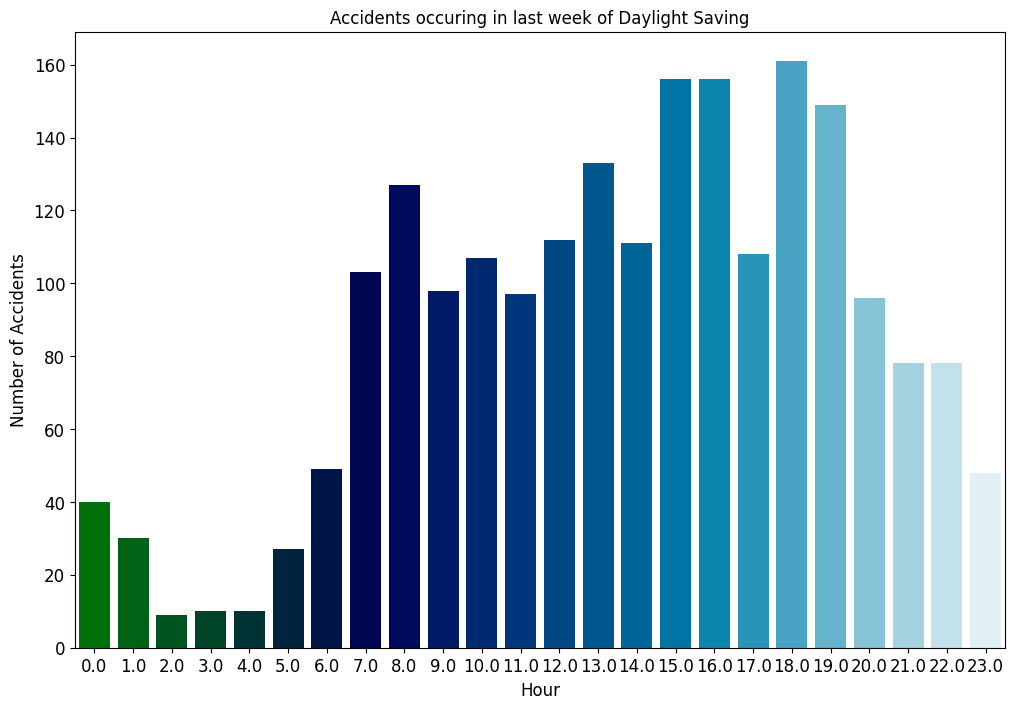

In [52]:
plt.style.use('default')
plt.figure(figsize=(12,8))

sns.barplot(end_week_count.index,end_week_count, 
            saturation=1, palette='ocean')
plt.title("Accidents occuring in last week of Daylight Saving",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

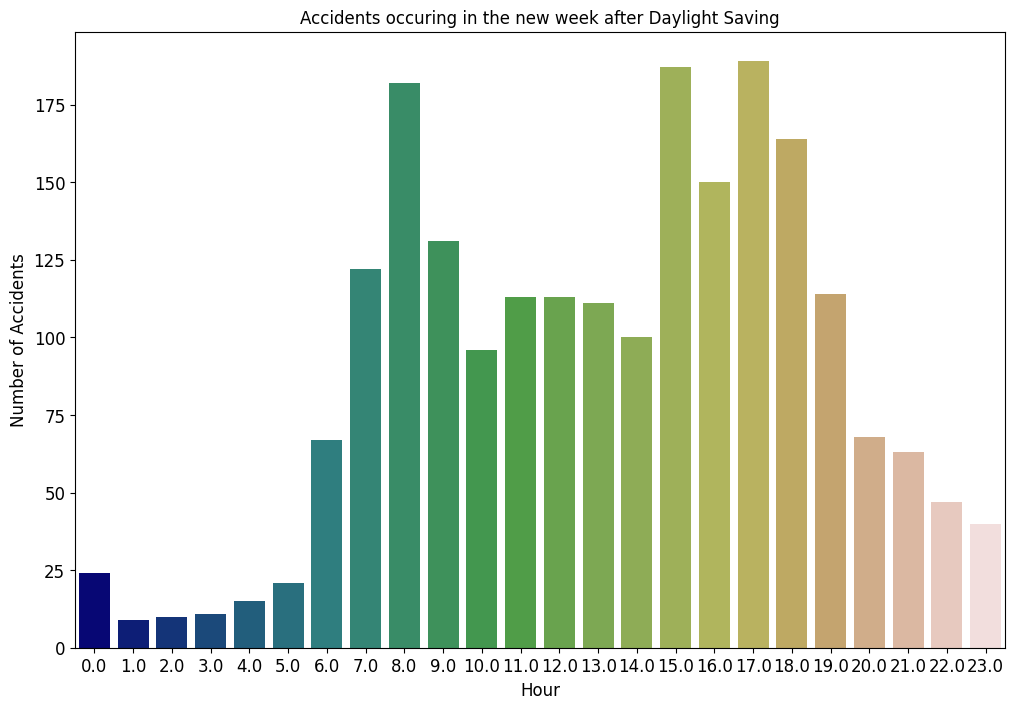

In [53]:
plt.style.use('default')
plt.figure(figsize=(12,8))

sns.barplot(new_week_count.index,new_week_count, 
            saturation=1, palette='gist_earth')
plt.title("Accidents occuring in the new week after Daylight Saving",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

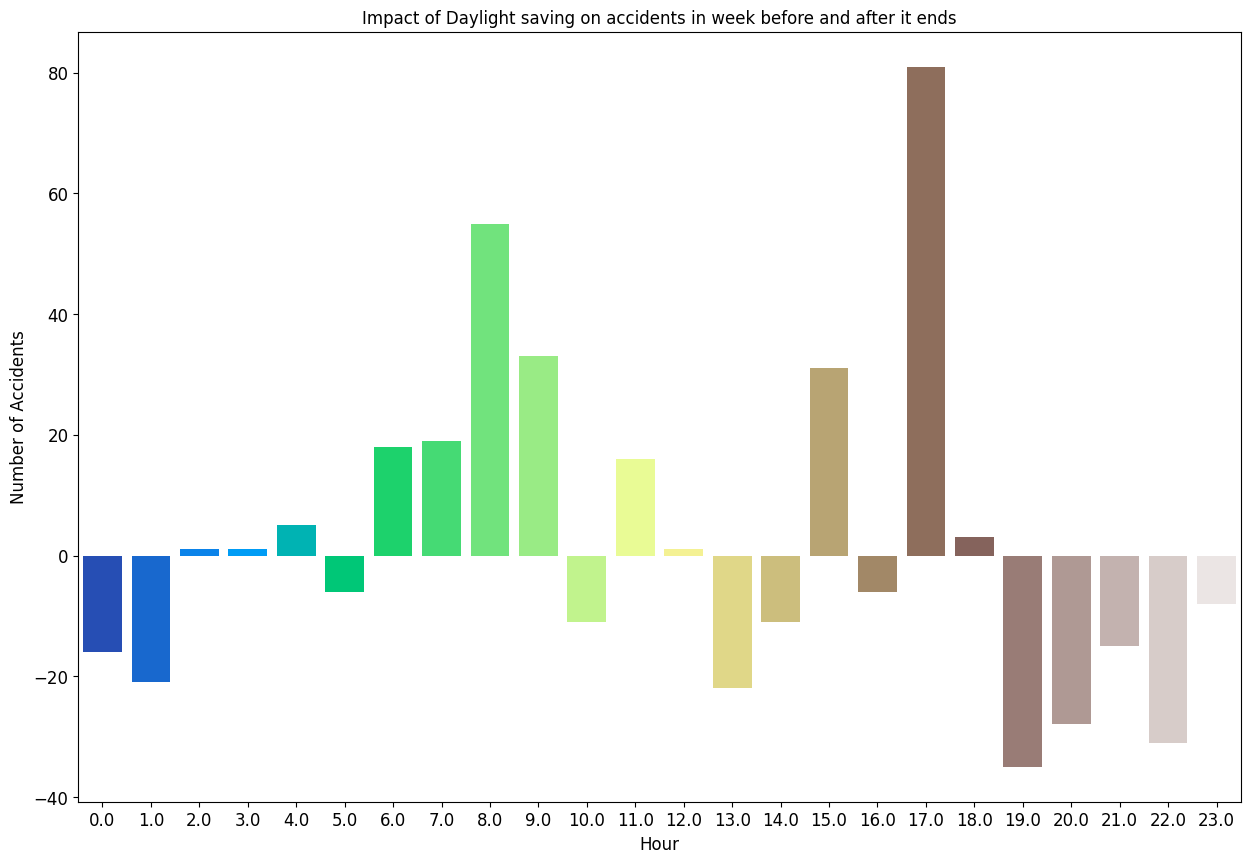

In [54]:
impact_calc = new_week_count - end_week_count

plt.style.use('default')
plt.figure(figsize=(15,10))

sns.barplot(impact_calc.index,impact_calc, 
            saturation=1, palette='terrain')
plt.title("Impact of Daylight saving on accidents in week before and after it ends",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

#Question E1. 
What impact, if any, does sunrise times have on road traffic accidents?

In [55]:
accidents_copy.head(2)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Day,Month,Year,Day_Number,apply_ind
0,2019010128300,-0.153842,51.508057,1.0,3.0,2.0,3.0,2019-02-18,Monday,17:50,1.0,E09000033,3.0,4202.0,1.0,30.0,1.0,2.0,3.0,4202.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,E01004762,17.0,18.0,February,2019.0,49.0,0.0
1,2019010152270,-0.127949,51.436208,1.0,3.0,2.0,1.0,2019-01-15,Tuesday,21:45,9.0,E09000022,3.0,23.0,2.0,30.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,1.0,1.0,0.0,0.0,1.0,3.0,E01003117,21.0,15.0,January,2019.0,15.0,0.0


In [56]:
march=accidents_copy[(accidents_copy['Month']==3)]
march['Day_Number'].value_counts().sort_index()

Series([], Name: Day_Number, dtype: int64)

In [57]:
# Using the month of march as case study

In [58]:
start_date = '2019-03-01'
end_date = '2019-03-31' 

rise_calc = accidents_copy[(accidents_copy['Date']>=start_date) & (accidents_copy['Date']<=end_date)]

In [59]:
sun_rise_calc = rise_calc['Date'].groupby(rise_calc['Hour'].isin([8,9])).value_counts()
sun_rise_calc = sun_rise_calc.loc[1].sort_index()
sun_rise_calc = pd.DataFrame(sun_rise_calc)
sun_rise_calc.columns = ['Sunrise_Date']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

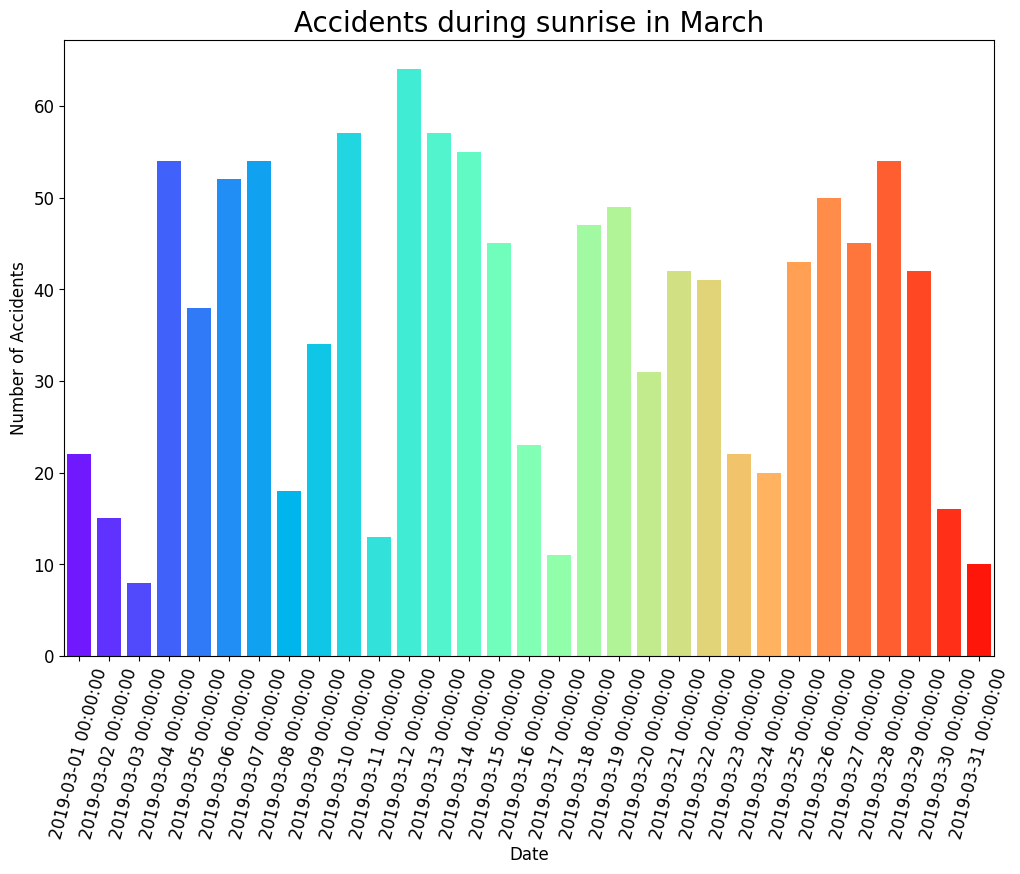

In [60]:
plt.style.use('default')
plt.figure(figsize=(12,8))
sns.barplot(sun_rise_calc.index,sun_rise_calc['Sunrise_Date'], 
            saturation=1, palette='rainbow')
plt.title("Accidents during sunrise in March",fontsize=20)
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)


# E2. What impact, if any, does sunset times have on road traffic accidents?

In [61]:
sun_set_calc = rise_calc['Date'].groupby(rise_calc['Hour'].isin([17,18])).value_counts()
sun_set_calc = sun_set_calc.loc[1].sort_index()
sun_set_calc = pd.DataFrame(sun_set_calc)
sun_set_calc.columns = ['Sunset_Date']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

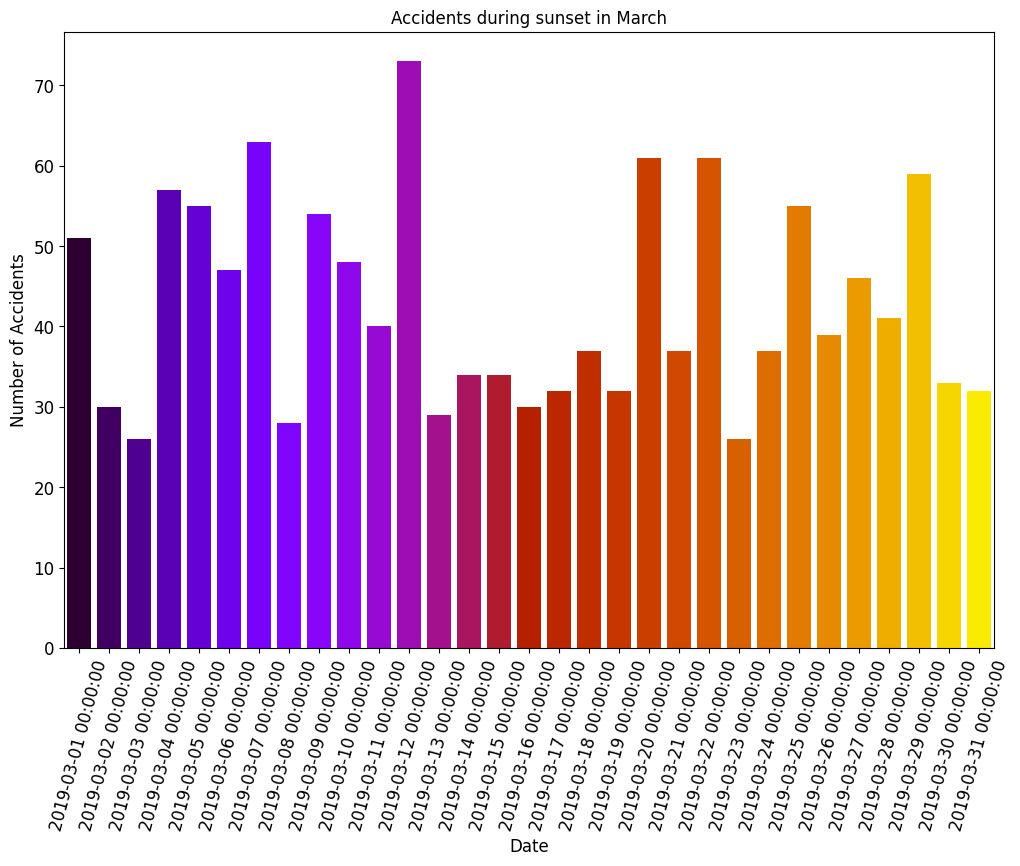

In [62]:
plt.style.use('default')
plt.figure(figsize=(12,8))

sns.barplot(sun_set_calc.index,sun_set_calc['Sunset_Date'], 
            saturation=1, palette='gnuplot')
plt.title("Accidents during sunset in March",fontsize=12)
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

In [63]:
sunrise_sunset_count = pd.concat([sun_rise_calc, sun_set_calc], axis = 1)
sunrise_sunset_count.columns

Index(['Sunrise_Date', 'Sunset_Date'], dtype='object')

In [64]:
before_sunrise = rise_calc['Date'].groupby(rise_calc['Hour'].isin([6,7])).value_counts()
before_sunrise = before_sunrise.loc[1].sort_index()
before_sunrise = pd.DataFrame(before_sunrise)
before_sunrise.columns = ['before_sunrise_count']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

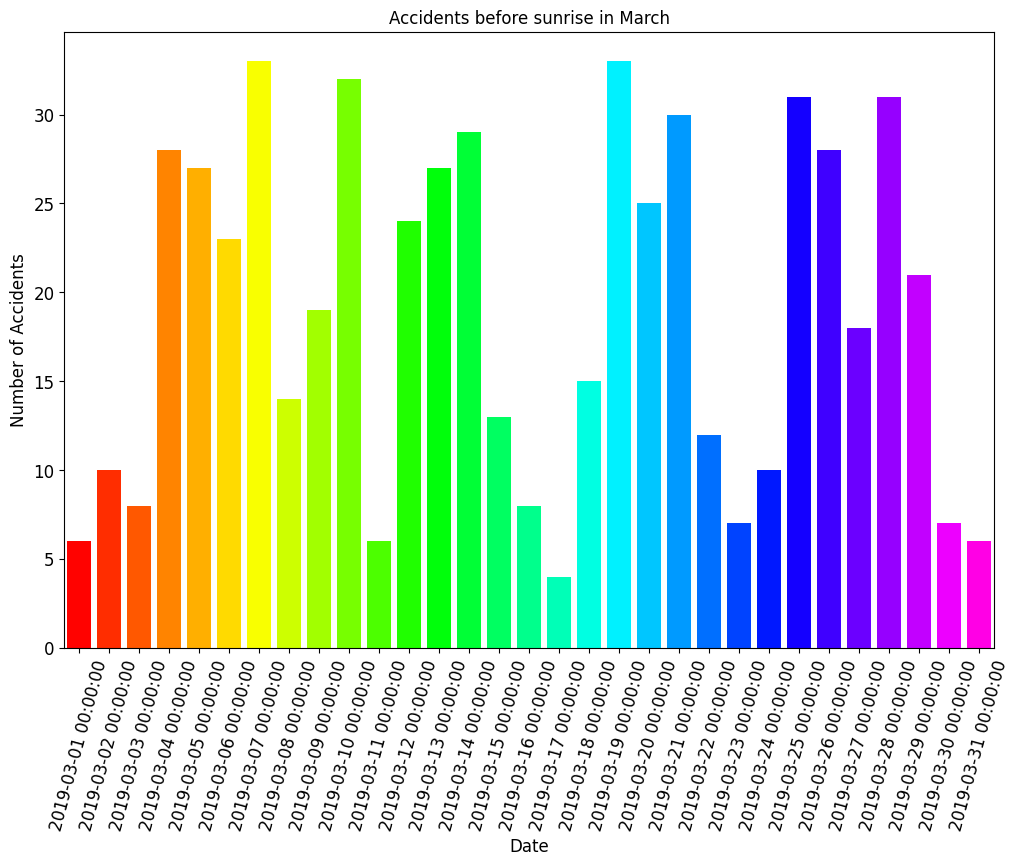

In [65]:
plt.style.use('default')
plt.figure(figsize=(12,8))

sns.barplot(before_sunrise.index,before_sunrise['before_sunrise_count'], 
            saturation=1, palette='gist_rainbow')
plt.title("Accidents before sunrise in March",fontsize=12)
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)


In [66]:
before_sunset = rise_calc['Date'].groupby(rise_calc['Hour'].isin([15,16])).value_counts()
before_sunset = before_sunset.loc[1].sort_index()
before_sunset = pd.DataFrame(before_sunset)
before_sunset.columns = ['before_sunset_count']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

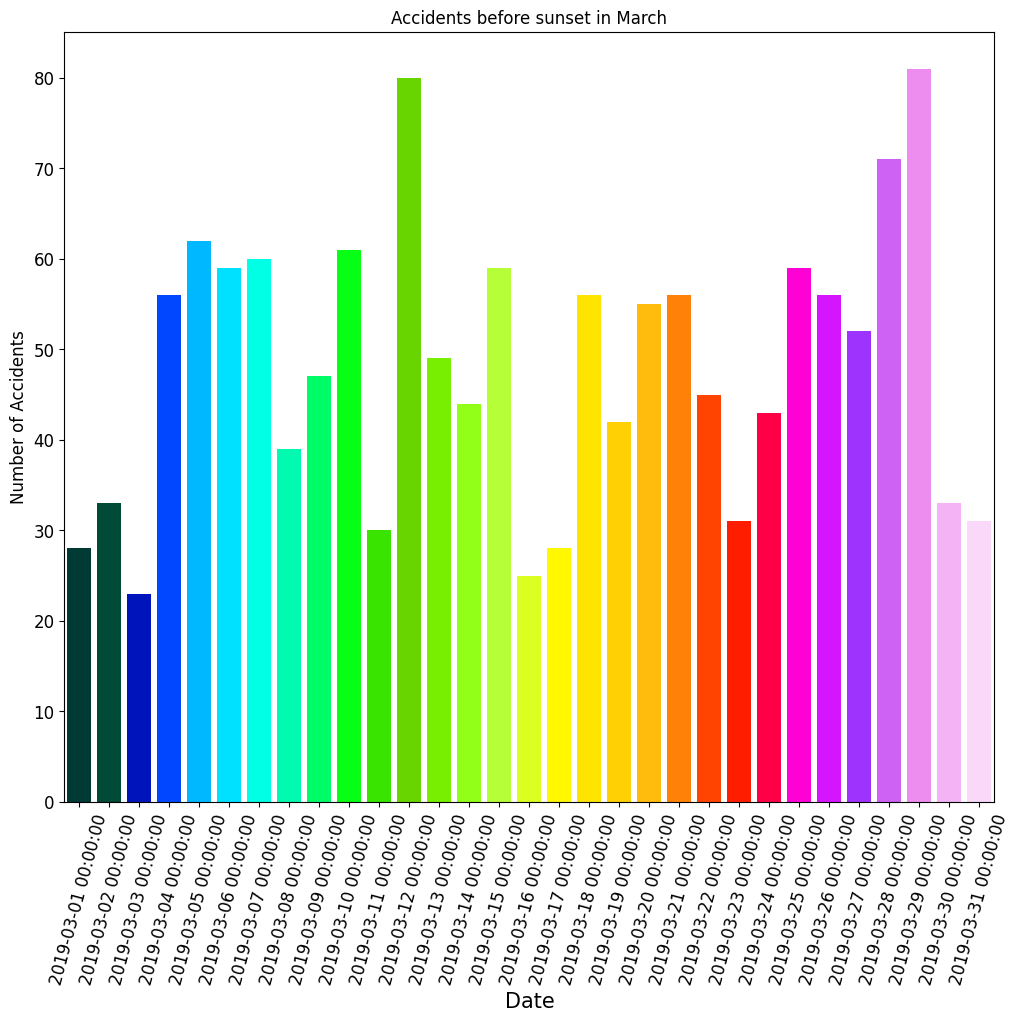

In [67]:
plt.style.use('default')
plt.figure(figsize=(12,10))

sns.barplot(before_sunset.index,before_sunset['before_sunset_count'], 
            saturation=1, palette='gist_ncar')
plt.title("Accidents before sunset in March",fontsize=12)
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of Accidents", fontsize=12)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

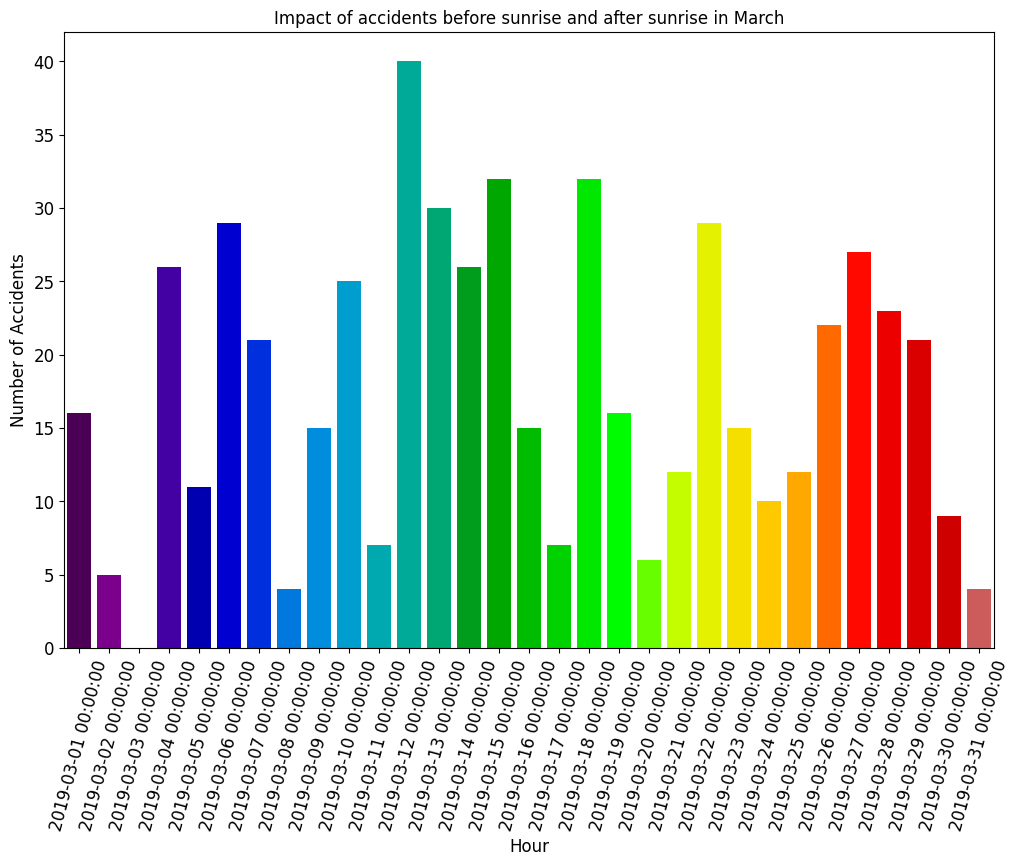

In [68]:
impact_diffrence = sun_rise_calc['Sunrise_Date'] - before_sunrise['before_sunrise_count']

plt.style.use('default')
plt.figure(figsize=(12,8))
sns.barplot(impact_diffrence.index,impact_diffrence, 
            saturation=1, palette='nipy_spectral')
plt.title("Impact of accidents before sunrise and after sunrise in March",fontsize=12)
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of Accidents')

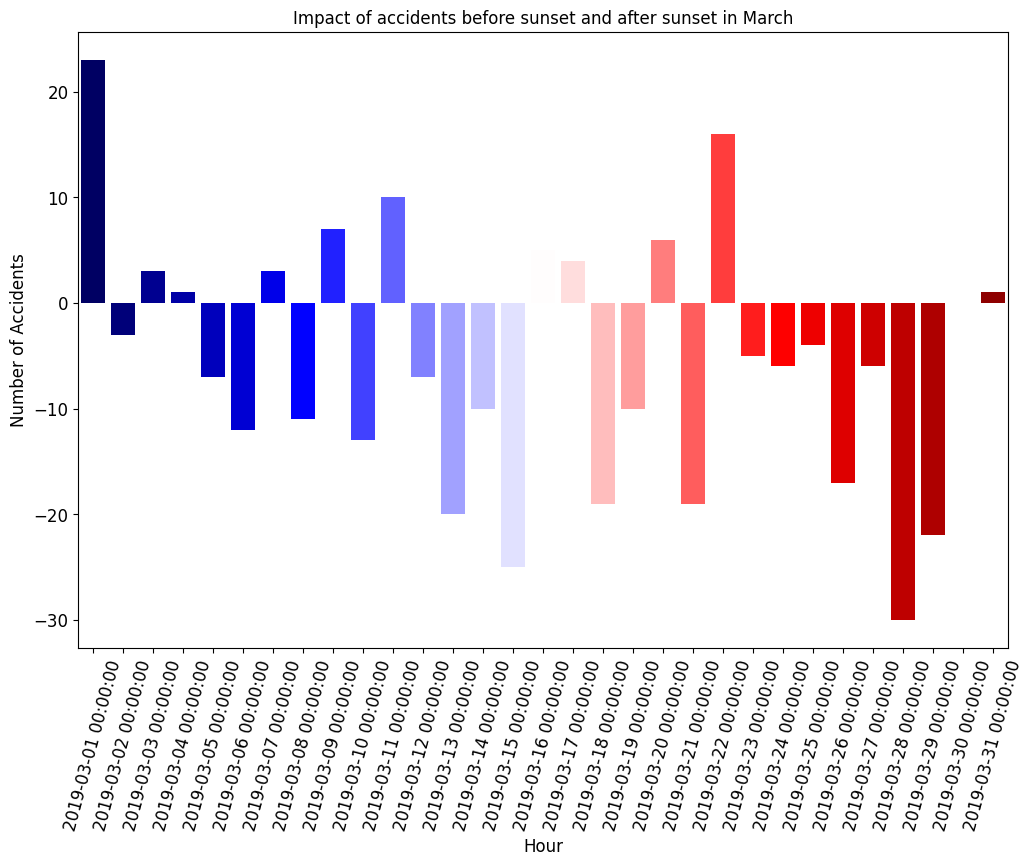

In [69]:
impact_diffrence = sun_set_calc['Sunset_Date'] - before_sunset['before_sunset_count']

plt.style.use('default')
plt.figure(figsize=(12,8))

sns.barplot(impact_diffrence.index,impact_diffrence, 
            saturation=1, palette='seismic')
plt.title("Impact of accidents before sunset and after sunset in March",fontsize=12)
plt.xticks(fontsize=12, rotation=75)
plt.yticks(fontsize=12)
plt.xlabel("Hour", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)

# F Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

In [70]:
vehicle_type=vehicles_copy.loc[:, vehicles_copy.columns.intersection(['Engine_Capacity_(CC)','Age_of_Vehicle'])]
vehicle_type

,Engine_Capacity_(CC),Age_of_Vehicle
0,-1,-1
1,-1,-1
2,-1,-1
3,-1,-1
4,-1,-1
...,...,...
216376,2198,4
216377,1997,12
216378,2967,5
216379,1597,6


In [71]:
kmeans_veh=KMeans(n_clusters=20, random_state=0)
kmeans_veh.fit(vehicle_type)

KMeans(n_clusters=20, random_state=0)

In [72]:
veh_pred=kmeans_veh.predict(vehicle_type)
veh_centroids = kmeans_veh.cluster_centers_
veh_pred

array([ 2,  2,  2, ...,  9,  0, 12], dtype=int32)

In [73]:
veh_centroids

array([[ 1.57370766e+03,  7.40184245e+00],
       [ 9.16052429e+03,  9.10857143e+00],
       [ 1.62369085e+01, -5.96970504e-02],
       [ 1.97467524e+03,  7.90645931e+00],
       [ 1.27178741e+04,  4.43770819e+00],
       [ 5.22475314e+03,  5.43235704e+00],
       [ 2.48501874e+03,  1.22925306e+01],
       [ 1.22012768e+03,  8.44590114e+00],
       [ 6.65634929e+03,  6.28715365e+00],
       [ 3.02251006e+03,  7.71241616e+00],
       [ 4.34473227e+03,  7.26772867e+00],
       [ 1.08488975e+04,  4.49369085e+00],
       [ 6.35998755e+02,  1.15560399e+01],
       [ 2.99800000e+04,  1.10000000e+01],
       [ 1.77499335e+03,  9.62467245e+00],
       [ 9.91695415e+02,  6.25190717e+00],
       [ 1.58015294e+04,  7.09803922e+00],
       [ 2.18113592e+03,  6.75847458e+00],
       [ 7.53746214e+03,  9.31650485e+00],
       [ 1.39135701e+03,  8.40259486e+00]])

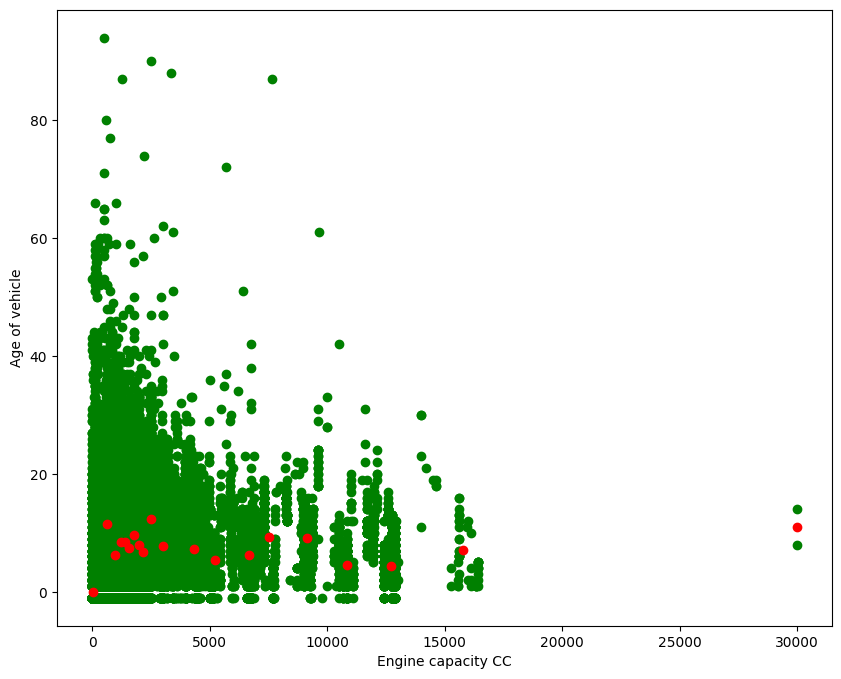

In [74]:
fig = plt.figure(figsize=(10,8))
colors = map(lambda x: colmap[x+1], veh_pred)
plt.xlabel('Engine capacity CC')
plt.ylabel('Age of vehicle')
plt.scatter(vehicle_type['Engine_Capacity_(CC)'],vehicle_type['Age_of_Vehicle'],color="green")
plt.scatter(veh_centroids[:,0],veh_centroids[:,1],color="red")
plt.show()

In [75]:
vehicles_copy

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,0,3,1,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,0,1,1,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,0,0,1,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,0,3,1,5,1,78,11,1597,2,6,8,3,8


In [76]:
vehicle_type = vehicle_type[vehicle_type.Age_of_Vehicle != -1]
vehicle_type = vehicle_type[vehicle_type['Engine_Capacity_(CC)'] != -1]

In [77]:
vehicle_type.describe().T


,count,mean,std,min,25%,50%,75%,max
Engine_Capacity_(CC),154216.0,1851.595496,1574.803823,1.0,1248.0,1597.0,1995.0,29980.0
Age_of_Vehicle,154216.0,8.236901,5.425481,1.0,4.0,8.0,12.0,94.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


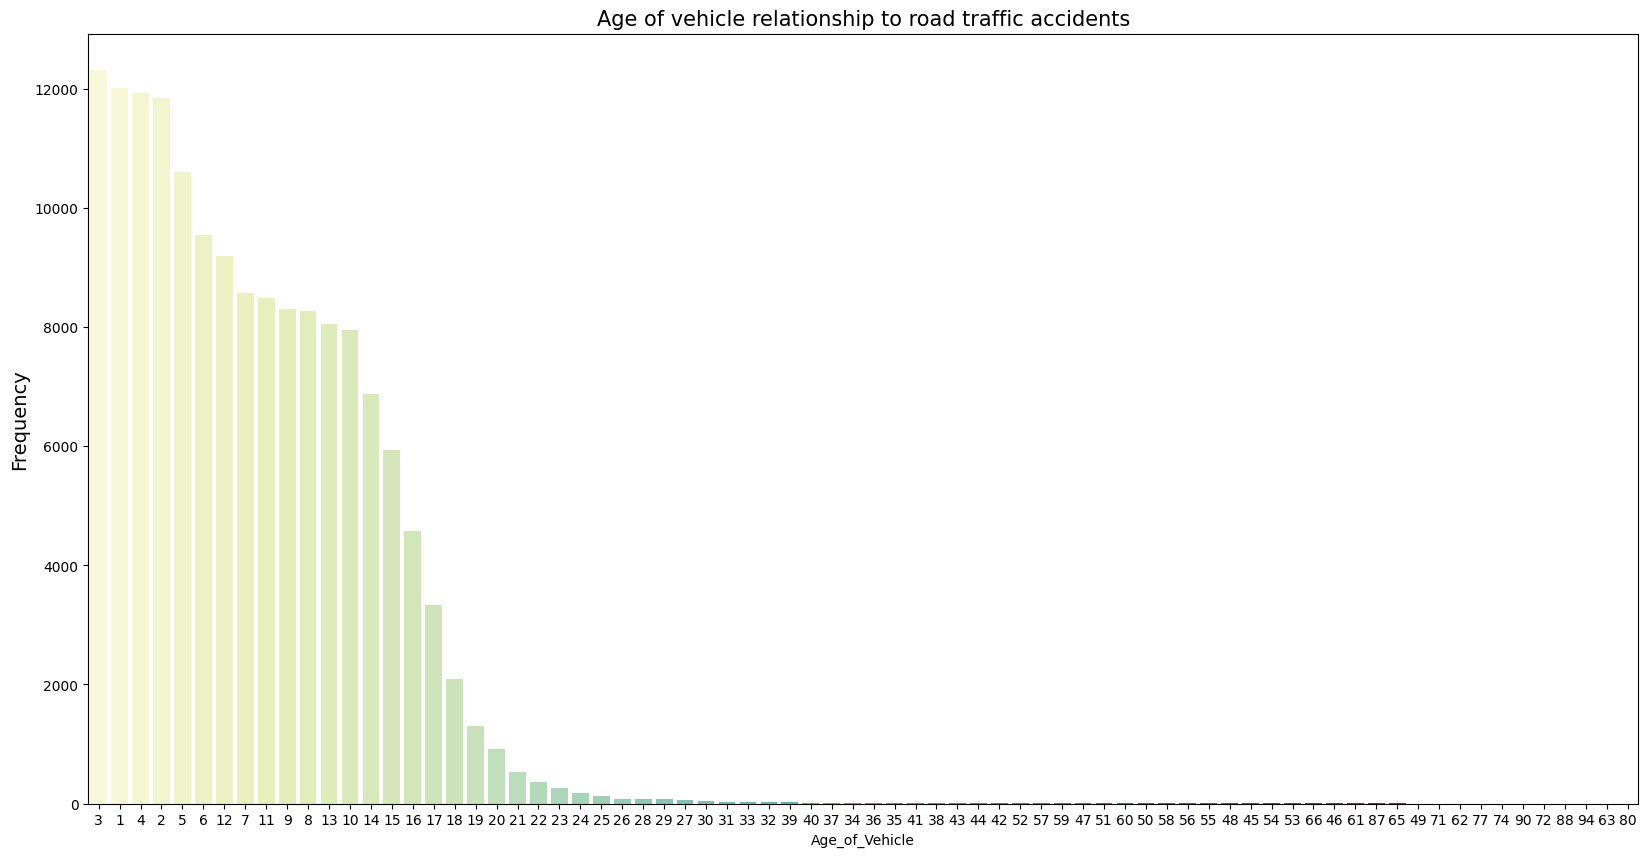

In [78]:
plt.figure(figsize=(20,10))
ax=sns.countplot('Age_of_Vehicle', data = vehicle_type,
                 order = vehicle_type["Age_of_Vehicle"].value_counts().index,
                 palette = "YlGnBu") 

plt.title('Age of vehicle relationship to road traffic accidents',fontsize=15)
plt.ylabel("Frequency", fontsize = 14,)
plt.show()




In [79]:
vehicle_type.Age_of_Vehicle.mode()

0    3
dtype: int64

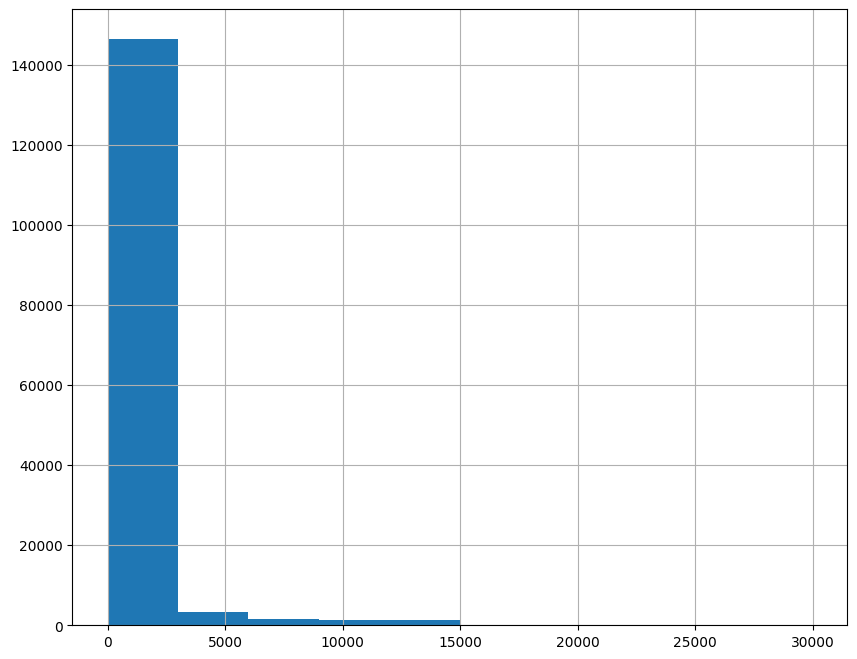

In [80]:
vehicle_type['Engine_Capacity_(CC)'].hist(figsize = (10,8))
plt.show()

In [81]:
vehicle_type['Engine_Capacity_(CC)'].mode()

0    1598
dtype: int64

# (g) Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?

In [82]:
Vehicle_and_Accidents=accidents_copy.merge(vehicles_copy, on=['Accident_Index'], how='inner')

In [83]:
new_df = Vehicle_and_Accidents.dropna()
new_df.reset_index(drop=True)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Day,Month,Year,Day_Number,apply_ind,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,-0.153842,51.508057,1.0,3.0,2.0,3.0,2019-02-18,Monday,17:50,1.0,E09000033,3.0,4202.0,1.0,30.0,1.0,2.0,3.0,4202.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,E01004762,17.0,18.0,February,2019.0,49.0,0.0,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,-0.153842,51.508057,1.0,3.0,2.0,3.0,2019-02-18,Monday,17:50,1.0,E09000033,3.0,4202.0,1.0,30.0,1.0,2.0,3.0,4202.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,E01004762,17.0,18.0,February,2019.0,49.0,0.0,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,-0.127949,51.436208,1.0,3.0,2.0,1.0,2019-01-15,Tuesday,21:45,9.0,E09000022,3.0,23.0,2.0,30.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,1.0,1.0,0.0,0.0,1.0,3.0,E01003117,21.0,15.0,January,2019.0,15.0,0.0,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,-0.127949,51.436208,1.0,3.0,2.0,1.0,2019-01-15,Tuesday,21:45,9.0,E09000022,3.0,23.0,2.0,30.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,1.0,1.0,0.0,0.0,1.0,3.0,E01003117,21.0,15.0,January,2019.0,15.0,0.0,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,-0.124193,51.526795,1.0,3.0,2.0,1.0,2019-01-01,Tuesday,01:50,2.0,E09000007,4.0,504.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01000943,1.0,1.0,January,2019.0,1.0,0.0,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206040,201963D090719,-3.339452,52.504551,63.0,3.0,2.0,1.0,2019-09-24,Tuesday,11:05,753.0,W06000023,3.0,489.0,6.0,40.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0,1.0,W01000483,11.0,24.0,September,2019.0,267.0,1.0,2,1,0,18,0,0,0,0,0,0,3,1,6,1,21,5,-1,-1,-1,3,1,3
206041,201963D091319,-3.191182,52.731252,63.0,3.0,2.0,1.0,2019-09-27,Friday,14:15,753.0,W06000023,3.0,490.0,6.0,60.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,2.0,2.0,6.0,0.0,2.0,1.0,W01000475,14.0,27.0,September,2019.0,270.0,1.0,1,9,0,16,0,1,1,0,0,0,1,1,2,1,25,5,1398,2,17,5,3,5
206042,201963D091319,-3.191182,52.731252,63.0,3.0,2.0,1.0,2019-09-27,Friday,14:15,753.0,W06000023,3.0,490.0,6.0,60.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,2.0,2.0,6.0,0.0,2.0,1.0,W01000475,14.0,27.0,September,2019.0,270.0,1.0,2,9,0,17,0,1,0,0,0,0,1,1,6,1,63,9,1910,2,11,7,3,7
206043,201963D091619,-3.471686,51.837624,63.0,3.0,2.0,1.0,2019-09-27,Friday,21:00,753.0,W06000023,3.0,4059.0,6.0,60.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,7.0,2.0,1.0,W01001897,21.0,27.0,September,2019.0,270.0,0.0,1,9,0,18,0,0,0,0,0,0,1,1,6,1,50,8,1364,1,8,9,1,9


In [84]:
accident_condition = new_df[['Longitude', 'Light_Conditions',	'Weather_Conditions',	'Road_Surface_Conditions',	'Special_Conditions_at_Site', 'Speed_limit']] 

accident_condition

,Longitude,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Speed_limit
0,-0.153842,1.0,1.0,1.0,0.0,30.0
1,-0.153842,1.0,1.0,1.0,0.0,30.0
2,-0.127949,4.0,1.0,1.0,0.0,30.0
3,-0.127949,4.0,1.0,1.0,0.0,30.0
4,-0.124193,4.0,1.0,1.0,0.0,30.0
...,...,...,...,...,...,...
206040,-3.339452,1.0,2.0,2.0,0.0,40.0
206041,-3.191182,1.0,2.0,2.0,6.0,60.0
206042,-3.191182,1.0,2.0,2.0,6.0,60.0
206043,-3.471686,1.0,1.0,4.0,0.0,60.0


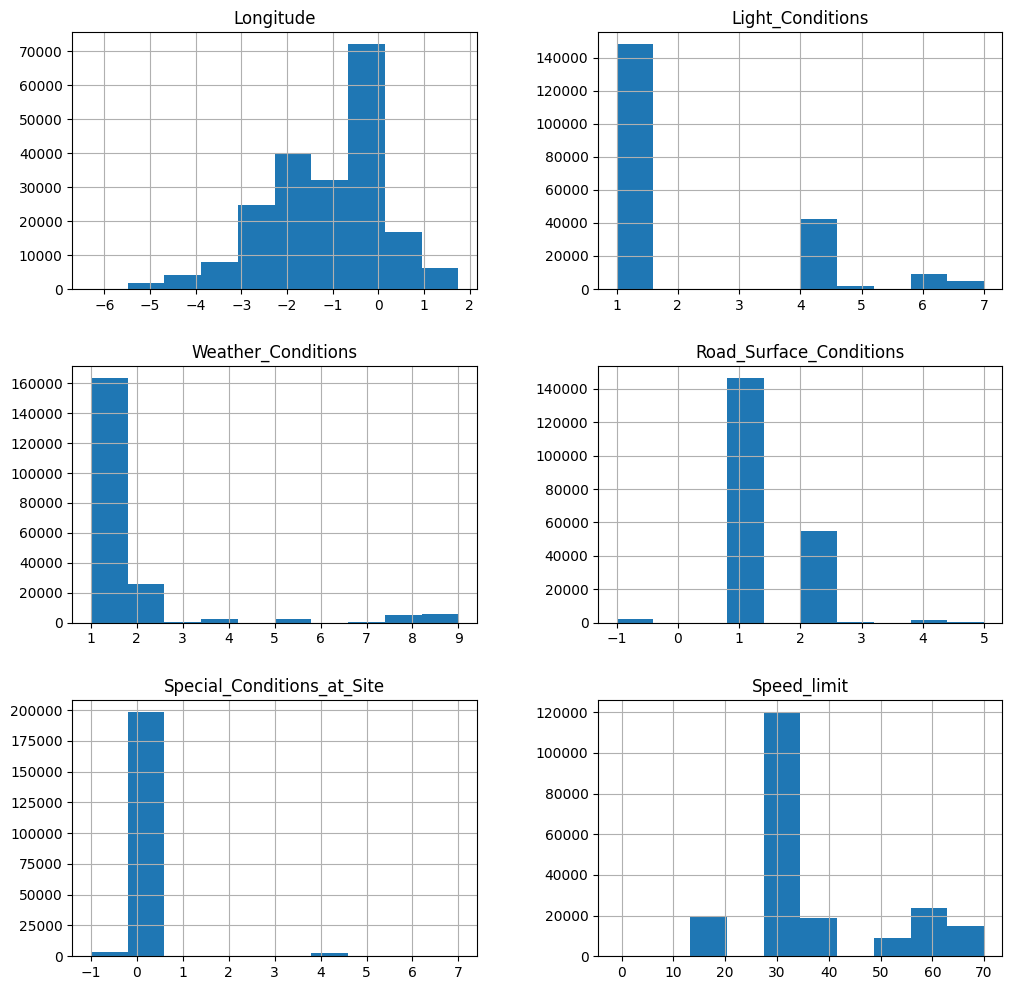

In [85]:
accident_condition.hist(figsize =(12,12))
plt.show()

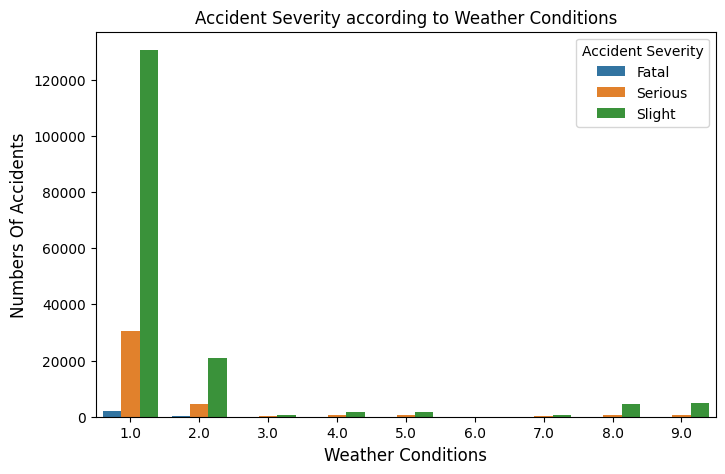

In [86]:
plt.figure(figsize=(8,5))
sns.countplot(data=new_df,x="Weather_Conditions",hue="Accident_Severity")
plt.title("Accident Severity according to Weather Conditions",size=12)
plt.xlabel("Weather Conditions",size=12)
plt.ylabel("Numbers Of Accidents",size=12)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])

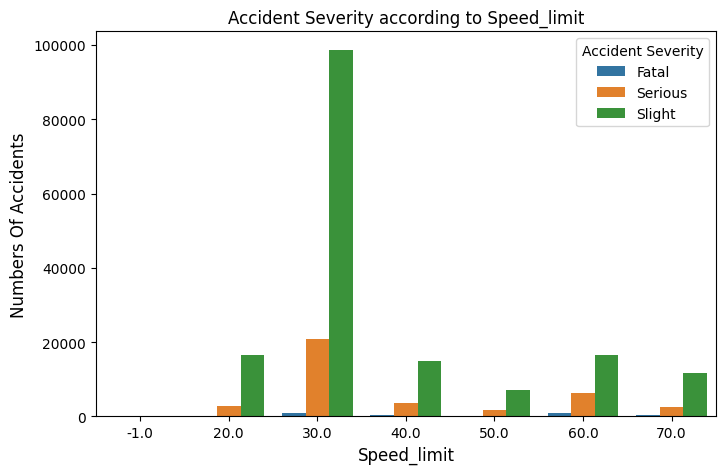

In [87]:
plt.figure(figsize=(8,5))
sns.countplot(data=new_df,x="Speed_limit",hue="Accident_Severity")
plt.title("Accident Severity according to Speed_limit",size=12)
plt.xlabel("Speed_limit",size=12)
plt.ylabel("Numbers Of Accidents",size=12)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])

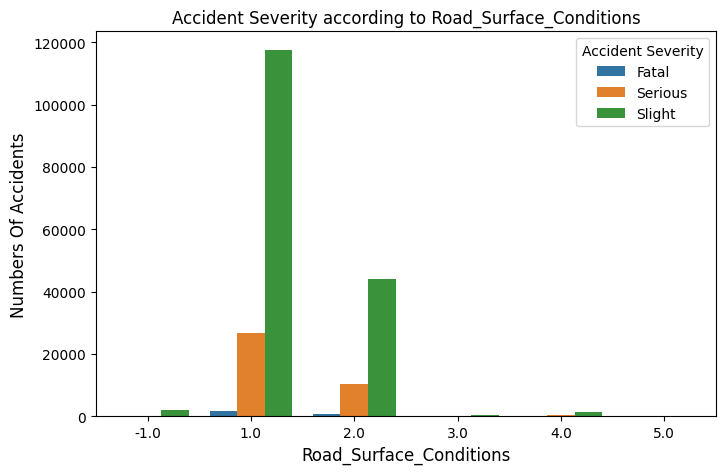

In [88]:
plt.figure(figsize=(8,5))
sns.countplot(data=new_df,x="Road_Surface_Conditions",hue="Accident_Severity")
plt.title("Accident Severity according to Road_Surface_Conditions",size=12)
plt.xlabel("Road_Surface_Conditions",size=12)
plt.ylabel("Numbers Of Accidents",size=12)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])

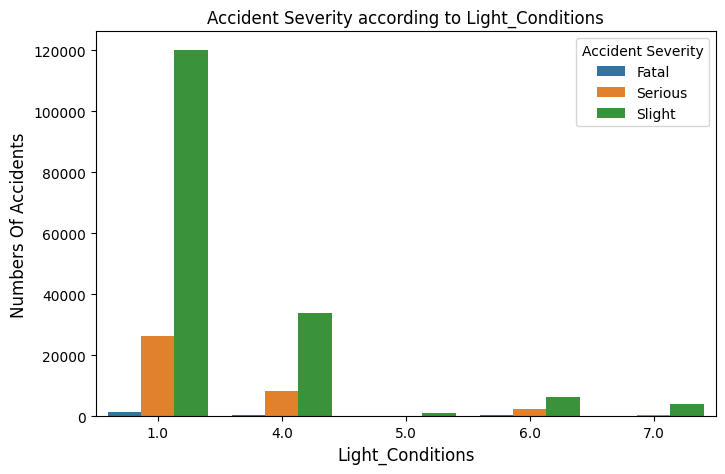

In [89]:
plt.figure(figsize=(8,5))
sns.countplot(data=new_df,x="Light_Conditions",hue="Accident_Severity")
plt.title("Accident Severity according to Light_Conditions",size=12)
plt.xlabel("Light_Conditions",size=12)
plt.ylabel("Numbers Of Accidents",size=12)
plt.legend(title="Accident Severity",labels=["Fatal","Serious","Slight"])

In [90]:
conditions=new_df.loc[:, new_df.columns.intersection(['Speed_limit','Weather_Conditions'])]
conditions

,Speed_limit,Weather_Conditions
0,30.0,1.0
1,30.0,1.0
2,30.0,1.0
3,30.0,1.0
4,30.0,1.0
...,...,...
206040,40.0,2.0
206041,60.0,2.0
206042,60.0,2.0
206043,60.0,1.0


In [91]:
kmeans=KMeans(n_clusters=6)
kmeans.fit(conditions)

KMeans(n_clusters=6)

In [92]:
labels = kmeans.predict(conditions)
centroids = kmeans.cluster_centers_
labels
centroids

array([[50.        ,  1.50005493],
       [30.        ,  1.65130517],
       [60.        ,  1.58005327],
       [19.87080236,  1.79512945],
       [40.        ,  1.53098943],
       [70.        ,  1.54155078]])

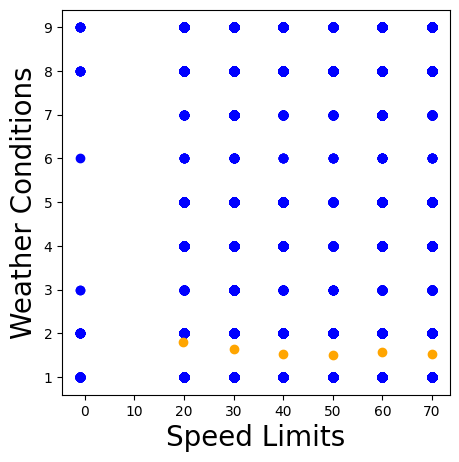

In [93]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(new_df['Speed_limit'],new_df['Weather_Conditions'],color="blue")
plt.scatter(centroids[:,0],centroids[:,1],color="orange")
plt.xlabel('Speed Limits',fontdict = {'fontsize' : 20})
plt.ylabel('Weather Conditions',fontdict = {'fontsize' : 20})
plt.show()

In [94]:
cols = ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR','Police_Force', 'Accident_Severity','Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week','Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)','1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit','Junction_Detail', 'Junction_Control', '2nd_Road_Class','2nd_Road_Number', 'Pedestrian_Crossing-Human_Control','Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions','Weather_Conditions', 'Road_Surface_Conditions','Special_Conditions_at_Site', 'Carriageway_Hazards','Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','LSOA_of_Accident_Location', 'converted_time', 'decimal_time', 'Day','Month', 'Year']
dfcasual = new_df[['Longitude', 'Latitude']]
dfcasual

,Longitude,Latitude
0,-0.153842,51.508057
1,-0.153842,51.508057
2,-0.127949,51.436208
3,-0.127949,51.436208
4,-0.124193,51.526795
...,...,...
206040,-3.339452,52.504551
206041,-3.191182,52.731252
206042,-3.191182,52.731252
206043,-3.471686,51.837624


In [95]:
kmeans=KMeans(n_clusters=25)
kmeans.fit(dfcasual)

KMeans(n_clusters=25)

In [96]:
labels = kmeans.predict(dfcasual)
centroids = kmeans.cluster_centers_

In [97]:
labels
centroids

array([[-2.86164353e+00,  5.34735360e+01],
       [-1.03246235e-01,  5.15171284e+01],
       [-3.16043247e+00,  5.14214653e+01],
       [-3.96859945e-01,  5.36297359e+01],
       [-1.99689872e+00,  5.25023841e+01],
       [-1.52474263e+00,  5.48391792e+01],
       [-1.22215365e+00,  5.29314937e+01],
       [-1.93911367e+00,  5.10201279e+01],
       [ 1.17571052e+00,  5.23230515e+01],
       [-5.03649369e+00,  5.03158861e+01],
       [-1.47642814e+00,  5.36740355e+01],
       [-2.46564973e+00,  5.15581855e+01],
       [-6.07713714e-01,  5.20721547e+01],
       [ 9.37549840e-01,  5.11725897e+01],
       [-2.27353710e+00,  5.34714915e+01],
       [ 4.08633280e-01,  5.14970953e+01],
       [-3.83482194e+00,  5.06013893e+01],
       [ 3.03333187e-02,  5.25482056e+01],
       [-1.43053236e-01,  5.09320613e+01],
       [-3.01112334e+00,  5.44445012e+01],
       [-5.33024750e-01,  5.14594907e+01],
       [-1.39910586e+00,  5.21418733e+01],
       [-3.71670271e+00,  5.29918334e+01],
       [-4.

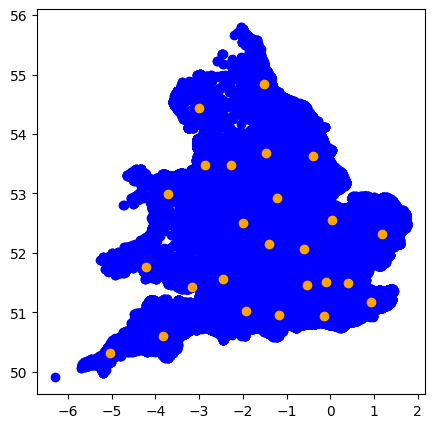

In [98]:
fig = plt.figure(figsize=(5,5))
colors = map(lambda x: colmap[x+1], labels)
plt.scatter(dfcasual["Longitude"],dfcasual["Latitude"],color="blue")
plt.scatter(centroids[:,0],centroids[:,1],color="orange")
plt.show()

In [99]:
kmeans.inertia_

17146.429896323134

In [100]:
union1 = pd.get_dummies(new_df.Accident_Severity, prefix='Severity')
union2 = pd.get_dummies(new_df.Speed_limit, prefix='Speed Limit')
union3 = pd.get_dummies(new_df.Weather_Conditions, prefix='Weather Conditions')

In [101]:
limit1=[union1,union2,union3]
union_123=pd.concat(limit1,axis=1)
union_123

,Severity_1.0,Severity_2.0,Severity_3.0,Speed Limit_-1.0,Speed Limit_20.0,Speed Limit_30.0,Speed Limit_40.0,Speed Limit_50.0,Speed Limit_60.0,Speed Limit_70.0,Weather Conditions_1.0,Weather Conditions_2.0,Weather Conditions_3.0,Weather Conditions_4.0,Weather Conditions_5.0,Weather Conditions_6.0,Weather Conditions_7.0,Weather Conditions_8.0,Weather Conditions_9.0
0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206040,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
206041,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
206042,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
206043,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


In [102]:
apriori(union_123,min_support=0.4,use_colnames=True)

,support,itemsets
0,0.803533,(Severity_3.0)
1,0.583436,(Speed Limit_30.0)
2,0.793065,(Weather Conditions_1.0)
3,0.478997,"(Speed Limit_30.0, Severity_3.0)"
4,0.633527,"(Weather Conditions_1.0, Severity_3.0)"
5,0.463695,"(Weather Conditions_1.0, Speed Limit_30.0)"


In [103]:
frequent_itemset=apriori(union_123,min_support=0.2,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Speed Limit_30.0),(Severity_3.0),0.583436,0.803533,0.478997,0.820994,1.021730,0.010187,1.097544
1,(Severity_3.0),(Speed Limit_30.0),0.803533,0.583436,0.478997,0.596114,1.021730,0.010187,1.031391
2,(Weather Conditions_1.0),(Severity_3.0),0.793065,0.803533,0.633527,0.798834,0.994151,-0.003727,0.976638
3,(Severity_3.0),(Weather Conditions_1.0),0.803533,0.793065,0.633527,0.788426,0.994151,-0.003727,0.978077
4,(Weather Conditions_1.0),(Speed Limit_30.0),0.793065,0.583436,0.463695,0.584687,1.002145,0.000993,1.003014
5,(Speed Limit_30.0),(Weather Conditions_1.0),0.583436,0.793065,0.463695,0.794766,1.002145,0.000993,1.008290
6,"(Weather Conditions_1.0, Speed Limit_30.0)",(Severity_3.0),0.463695,0.803533,0.379407,0.818227,1.018286,0.006813,1.080833
7,"(Weather Conditions_1.0, Severity_3.0)",(Speed Limit_30.0),0.633527,0.583436,0.379407,0.598882,1.026474,0.009785,1.038507
8,"(Speed Limit_30.0, Severity_3.0)",(Weather Conditions_1.0),0.478997,0.793065,0.379407,0.792087,0.998767,-0.000468,0.995297
9,(Weather Conditions_1.0),"(Speed Limit_30.0, Severity_3.0)",0.793065,0.478997,0.379407,0.478407,0.998767,-0.000468,0.998868


#Question H.
#How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)? 

In [104]:
predictors = ['Age_of_Driver','Journey_Purpose_of_Driver','Sex_of_Driver','Age_of_Vehicle','Driver_Home_Area_Type']
to_use = accidents_copy_vehicles_copy.dropna()
to_use.reset_index(drop=True)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Hour,Day,Month,Year,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,Hit_Object_off_Carriageway,1st_Point_of_Impact,Was_Vehicle_Left_Hand_Drive?,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Vehicle_match
0,2019010128300,-0.153842,51.508057,1.0,3.0,2.0,3.0,18/02/2019,Monday,17:50,1.0,E09000033,3.0,4202.0,1.0,30.0,1.0,2.0,3.0,4202.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,E01004762,17.0,18.0,February,2019.0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,-1,4,-1,6,1,58,9,-1,-1,-1,2,1,2,Nil
1,2019010152270,-0.127949,51.436208,1.0,3.0,2.0,1.0,15/01/2019,Tuesday,21:45,9.0,E09000022,3.0,23.0,2.0,30.0,0.0,-1.0,-1.0,0.0,-1.0,-1.0,4.0,1.0,1.0,0.0,0.0,1.0,3.0,E01003117,21.0,15.0,January,2019.0,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,2,1,2,Nil
2,2019010155191,-0.124193,51.526795,1.0,3.0,2.0,1.0,01/01/2019,Tuesday,01:50,2.0,E09000007,4.0,504.0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01000943,1.0,1.0,January,2019.0,2019010152270,1,9,0,18,-1,0,-1,-1,-1,-1,1,-1,6,2,24,5,-1,-1,-1,3,1,3,Nil
3,2019010155192,-0.191044,51.546387,1.0,2.0,1.0,1.0,01/01/2019,Tuesday,01:20,2.0,E09000007,4.0,510.0,6.0,20.0,3.0,4.0,4.0,510.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01000973,1.0,1.0,January,2019.0,2019010152270,2,9,0,18,-1,0,-1,-1,-1,-1,-1,-1,6,3,-1,-1,-1,-1,-1,6,1,6,Nil
4,2019010155194,-0.200064,51.541121,1.0,3.0,2.0,2.0,01/01/2019,Tuesday,00:40,28.0,E09000005,3.0,4003.0,6.0,30.0,6.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,E01000546,0.0,1.0,January,2019.0,2019010155191,1,9,0,3,0,1,0,0,0,0,2,1,6,1,45,7,-1,-1,-1,4,1,4,Nil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111755,201963DF02919,-3.094841,52.739912,63.0,1.0,3.0,2.0,17/08/2019,Saturday,16:29,753.0,W06000023,3.0,483.0,6.0,60.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,W01000457,16.0,17.0,August,2019.0,2019301901577,2,4,0,18,0,1,0,0,0,0,1,1,6,1,20,4,124,1,12,4,2,4,MBike >125cc-500cc
111756,201963DF03019,-3.322442,52.335266,63.0,1.0,3.0,2.0,25/08/2019,Sunday,11:40,753.0,W06000023,3.0,483.0,6.0,60.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,W01000427,11.0,25.0,August,2019.0,2019301901578,1,9,0,13,0,0,0,0,0,0,4,1,2,1,52,8,1984,1,4,10,3,10,Nil
111757,201963DF03319,-3.515306,52.506924,63.0,1.0,1.0,1.0,22/09/2019,Sunday,23:15,753.0,W06000023,4.0,4569.0,6.0,30.0,0.0,-1.0,-1.0,0.0,0.0,0.0,4.0,2.0,2.0,0.0,0.0,2.0,1.0,W01000429,23.0,22.0,September,2019.0,2019301901578,2,1,0,18,0,0,0,0,0,0,3,1,6,1,29,6,-1,-1,-1,9,1,9,Nil
111758,201963DF03419,-3.651922,52.097790,63.0,1.0,1.0,2.0,05/10/2019,Saturday,12:50,753.0,W06000023,3.0,483.0,6.0,60.0,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,W01000471,12.0,10.0,May,2019.0,2019301901579,1,9,0,18,0,0,0,0,0,0,1,1,6,3,-1,-1,-1,-1,-1,5,1,5,Nil


In [105]:
to_use = to_use[['Age_of_Driver','Journey_Purpose_of_Driver','Accident_Severity','Sex_of_Driver','Age_of_Vehicle','Driver_Home_Area_Type']]
 

In [106]:
to_use_now = to_use[(to_use['Age_of_Driver'] > 0) & (to_use['Journey_Purpose_of_Driver'] > 0) & (to_use['Sex_of_Driver'] > 0) & (to_use['Age_of_Vehicle'] > 0)& (to_use['Driver_Home_Area_Type'] > 0)]
to_use_now

,Age_of_Driver,Journey_Purpose_of_Driver,Accident_Severity,Sex_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type
105,23,6,2.0,1,1,1
182,40,6,3.0,1,14,1
201,48,1,3.0,1,7,1
415,46,2,2.0,1,1,1
458,55,6,3.0,2,11,1
...,...,...,...,...,...,...
111843,34,6,1.0,1,10,1
111846,21,6,1.0,2,11,1
111847,20,6,1.0,1,12,2
111848,52,2,1.0,1,4,3


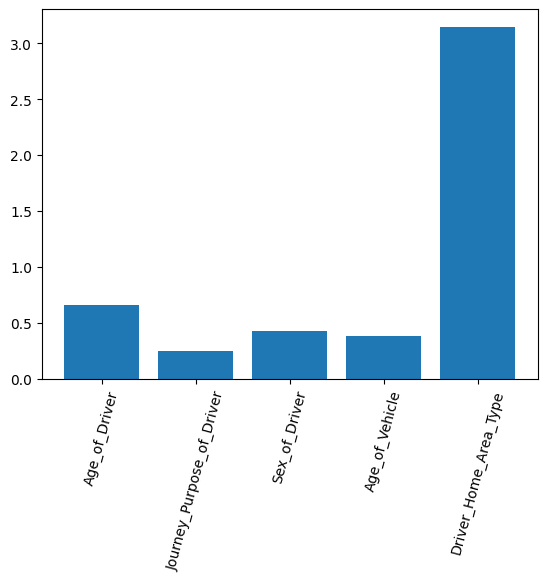

In [109]:
# Perform the feature selection
selector = SelectKBest(f_classif, k="all")
selector.fit(to_use_now[predictors], to_use_now["Accident_Severity"])

# Here we will get the p-values for each feature and then transform from p-values into some scores
scores = -np.log10(selector.pvalues_)
# Use plt to plot the scores!  
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='75')
plt.show()

# Question I.

# Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models? 

In [108]:
# Using Decision Tree Classifier for prediction
y_target = to_use_now["Accident_Severity"].values
Xfeatures = to_use_now.drop("Accident_Severity", axis=1)
X_train, X_validation, y_train, y_validation = train_test_split(Xfeatures,y_target,test_size=.25,random_state=1)
decision_tree = DecisionTreeClassifier(criterion="gini") 
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_validation)
sk_report = classification_report(digits=6,y_true=y_validation,y_pred=Y_pred)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print("Accuracy =",acc_decision_tree)

Accuracy = 83.24
